# Initial EDA

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('data/RNAseqHarm/ROSMAP_Differential_Expression_(diagnosis-sex-age-death).tsv', delimiter="\t")

In [4]:
df.columns

Index(['Comparison', 'ensembl_gene_id', 'logFC', 'CI.L', 'CI.R', 'AveExpr',
       't', 'P.Value', 'adj.P.Val', 'Direction', 'hgnc_symbol',
       'percentage_gene_gc_content', 'gene_biotype', 'chromosome_name',
       'gene_length'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113154 entries, 0 to 113153
Data columns (total 15 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Comparison                  113154 non-null  object 
 1   ensembl_gene_id             113154 non-null  object 
 2   logFC                       113154 non-null  float64
 3   CI.L                        113154 non-null  float64
 4   CI.R                        113154 non-null  float64
 5   AveExpr                     113154 non-null  float64
 6   t                           113154 non-null  float64
 7   P.Value                     113154 non-null  float64
 8   adj.P.Val                   113154 non-null  float64
 9   Direction                   113154 non-null  object 
 10  hgnc_symbol                 113154 non-null  object 
 11  percentage_gene_gc_content  113154 non-null  float64
 12  gene_biotype                113154 non-null  object 
 13  chromosome_nam

In [6]:
df.head()

,Comparison,ensembl_gene_id,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,Direction,hgnc_symbol,percentage_gene_gc_content,gene_biotype,chromosome_name,gene_length
0,diagnosis_sex_tissue*age_death.AD_male_DLPFC -...,ENSG00000229807,-0.220775,-0.284139,-0.157411,6.781880,-6.827348,1.090264e-11,1.320389e-07,none,XIST,39.781761,lncRNA,X,32075
1,diagnosis_sex_tissue*age_death.AD_male_DLPFC -...,ENSG00000012223,0.200368,0.067894,0.332843,0.345780,2.963137,3.074832e-03,5.271660e-02,none,LTF,46.946965,protein_coding,3,49590
2,diagnosis_sex_tissue*age_death.AD_male_DLPFC -...,ENSG00000197261,-0.179306,-0.259422,-0.099189,0.350286,-4.385434,1.206931e-05,1.979262e-03,none,C6orf141,42.772154,protein_coding,6,11262
3,diagnosis_sex_tissue*age_death.AD_male_DLPFC -...,ENSG00000165370,-0.163187,-0.291942,-0.034432,-1.028209,-2.483297,1.308440e-02,1.206114e-01,none,GPR101,47.945633,protein_coding,X,6401
4,diagnosis_sex_tissue*age_death.AD_male_DLPFC -...,ENSG00000165409,-0.156953,-0.238714,-0.075192,-1.930546,-3.762337,1.723253e-04,1.015589e-02,none,TSHR,38.846085,protein_coding,14,191314


In [7]:
# setting it so that it doesn't show RNA seq that are from chromosome Y and the patient is female
# this is likely an artifact
pd.set_option('display.max_colwidth', None)
df1 = df[~((df['chromosome_name'] == 'Y') & (df['Comparison'].str.contains('female')))]
df1.sort_values(by='adj.P.Val').head(20)

,Comparison,ensembl_gene_id,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,Direction,hgnc_symbol,percentage_gene_gc_content,gene_biotype,chromosome_name,gene_length
56583,diagnosis_sex_tissue*age_death.AD_female_ACC - diagnosis_sex_tissue*age_death.CT_female_ACC,ENSG00000104888,-0.575237,-0.652693,-0.497781,6.273356,-14.550327,4.865472e-46,8.341630e-43,down,SLC17A7,57.708333,protein_coding,19,12960
56792,diagnosis_sex_tissue*age_death.AD_female_ACC - diagnosis_sex_tissue*age_death.CT_female_ACC,ENSG00000101638,-0.235819,-0.268474,-0.203164,6.284934,-14.150511,9.865539e-44,1.431186e-40,none,ST8SIA5,47.593425,protein_coding,18,91437
56782,diagnosis_sex_tissue*age_death.AD_female_ACC - diagnosis_sex_tissue*age_death.CT_female_ACC,ENSG00000136928,-0.238196,-0.271422,-0.204970,7.029614,-14.047272,3.811471e-43,5.134323e-40,none,GABBR2,45.670786,protein_coding,9,420827
56769,diagnosis_sex_tissue*age_death.AD_female_ACC - diagnosis_sex_tissue*age_death.CT_female_ACC,ENSG00000073670,-0.241267,-0.275817,-0.206717,5.507145,-13.683763,4.159525e-41,5.229632e-38,none,ADAM11,59.333304,protein_coding,17,22859
56606,diagnosis_sex_tissue*age_death.AD_female_ACC - diagnosis_sex_tissue*age_death.CT_female_ACC,ENSG00000157542,-0.408573,-0.467444,-0.349701,4.918666,-13.597848,1.241943e-40,1.463863e-37,down,KCNJ6,42.731038,protein_coding,21,513973
56887,diagnosis_sex_tissue*age_death.AD_female_ACC - diagnosis_sex_tissue*age_death.CT_female_ACC,ENSG00000148082,-0.208795,-0.241373,-0.176217,7.632440,-12.558413,4.352420e-35,4.828370e-32,none,SHC3,42.722828,protein_coding,9,173048
56624,diagnosis_sex_tissue*age_death.AD_female_ACC - diagnosis_sex_tissue*age_death.CT_female_ACC,ENSG00000166006,-0.368004,-0.425634,-0.310374,5.376215,-12.511053,7.626166e-35,7.990103e-32,down,KCNC2,34.224816,protein_coding,12,169792
56921,diagnosis_sex_tissue*age_death.AD_female_ACC - diagnosis_sex_tissue*age_death.CT_female_ACC,ENSG00000174514,-0.200257,-0.231740,-0.168774,5.542094,-12.464474,1.321632e-34,1.311825e-31,none,MFSD4A,50.981372,protein_coding,1,34034
56693,diagnosis_sex_tissue*age_death.AD_female_ACC - diagnosis_sex_tissue*age_death.CT_female_ACC,ENSG00000182870,-0.285344,-0.330245,-0.240443,4.684112,-12.452640,1.519343e-34,1.432664e-31,down,GALNT9,58.478550,protein_coding,12,133218
56705,diagnosis_sex_tissue*age_death.AD_female_ACC - diagnosis_sex_tissue*age_death.CT_female_ACC,ENSG00000175874,-0.276047,-0.319927,-0.232167,6.339618,-12.325633,6.734502e-34,6.047903e-31,down,CREG2,44.911093,protein_coding,2,41954


In [7]:
df.shape

(113154, 15)

In [8]:
df.sort_values(by='logFC', ascending=False).head(20)

,Comparison,ensembl_gene_id,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,Direction,hgnc_symbol,percentage_gene_gc_content,gene_biotype,chromosome_name,gene_length
56595,diagnosis_sex_tissue*age_death.AD_female_ACC - diagnosis_sex_tissue*age_death.CT_female_ACC,ENSG00000205358,0.463662,0.369447,0.557877,1.229448,9.641348,1.302571e-21,1.981064e-19,up,MT1H,54.635258,protein_coding,16,1316
18902,diagnosis_sex_tissue*age_death.AD_female_DLPFC - diagnosis_sex_tissue*age_death.CT_female_DLPFC,ENSG00000124253,0.403691,0.277776,0.529606,1.039574,6.281078,3.974441e-10,2.425695e-08,up,PCK1,48.324340,protein_coding,20,7042
18903,diagnosis_sex_tissue*age_death.AD_female_DLPFC - diagnosis_sex_tissue*age_death.CT_female_DLPFC,ENSG00000187474,0.403114,0.298398,0.507831,-0.702729,7.543339,6.444876e-14,1.066175e-11,up,FPR3,42.762776,protein_coding,19,31034
56609,diagnosis_sex_tissue*age_death.AD_female_ACC - diagnosis_sex_tissue*age_death.CT_female_ACC,ENSG00000188488,0.398279,0.310452,0.486105,-0.429329,8.884934,1.219355e-18,1.054854e-16,up,SERPINA5,49.183951,protein_coding,14,31677
18912,diagnosis_sex_tissue*age_death.AD_female_DLPFC - diagnosis_sex_tissue*age_death.CT_female_DLPFC,ENSG00000266489,0.374544,0.195932,0.553156,-1.509376,4.108252,4.119055e-05,3.738364e-04,up,AC007922.3,41.225962,lncRNA,18,27456
18925,diagnosis_sex_tissue*age_death.AD_female_DLPFC - diagnosis_sex_tissue*age_death.CT_female_DLPFC,ENSG00000228058,0.339072,0.251441,0.426702,1.327228,7.581494,4.838753e-14,8.295822e-12,up,LINC01736,49.730514,lncRNA,1,4824
18926,diagnosis_sex_tissue*age_death.AD_female_DLPFC - diagnosis_sex_tissue*age_death.CT_female_DLPFC,ENSG00000111087,0.336797,0.255465,0.418129,1.476442,8.113809,7.723409e-16,1.995285e-13,up,GLI1,55.270747,protein_coding,12,12484
18929,diagnosis_sex_tissue*age_death.AD_female_DLPFC - diagnosis_sex_tissue*age_death.CT_female_DLPFC,ENSG00000188269,0.328450,0.211724,0.445175,-0.477565,5.513311,3.895373e-08,1.133686e-06,up,OR7A5,41.649298,protein_coding,19,11035
56653,diagnosis_sex_tissue*age_death.AD_female_ACC - diagnosis_sex_tissue*age_death.CT_female_ACC,ENSG00000124253,0.322077,0.223668,0.420487,1.039574,6.411899,1.722610e-10,2.910995e-09,up,PCK1,48.324340,protein_coding,20,7042
56664,diagnosis_sex_tissue*age_death.AD_female_ACC - diagnosis_sex_tissue*age_death.CT_female_ACC,ENSG00000125144,0.316443,0.244571,0.388314,5.124732,8.625466,1.136124e-17,7.994836e-16,up,MT1G,54.082397,protein_coding,16,1335


In [8]:
df.sort_values(by='logFC').head(20)

,Comparison,ensembl_gene_id,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,Direction,hgnc_symbol,percentage_gene_gc_content,gene_biotype,chromosome_name,gene_length
18859,diagnosis_sex_tissue*age_death.AD_female_DLPFC - diagnosis_sex_tissue*age_death.CT_female_DLPFC,ENSG00000012817,-0.973371,-1.045253,-0.901490,-0.190111,-26.546846,1.661221e-136,1.044299e-132,down,KDM5D,38.660986,protein_coding,Y,41075
18860,diagnosis_sex_tissue*age_death.AD_female_DLPFC - diagnosis_sex_tissue*age_death.CT_female_DLPFC,ENSG00000129824,-0.973039,-1.042655,-0.903423,-0.651251,-27.401985,3.480934e-144,3.282347e-140,down,RPS4Y1,40.557971,protein_coding,Y,90399
18861,diagnosis_sex_tissue*age_death.AD_female_DLPFC - diagnosis_sex_tissue*age_death.CT_female_DLPFC,ENSG00000114374,-0.971477,-1.045235,-0.897718,0.238351,-25.819738,5.008768e-130,2.361509e-126,down,USP9Y,38.756768,protein_coding,Y,323190
18862,diagnosis_sex_tissue*age_death.AD_female_DLPFC - diagnosis_sex_tissue*age_death.CT_female_DLPFC,ENSG00000067048,-0.962018,-1.030551,-0.893484,-0.188534,-27.521256,2.784457e-145,5.251207e-141,down,DDX3Y,37.700812,protein_coding,Y,16371
18863,diagnosis_sex_tissue*age_death.AD_female_DLPFC - diagnosis_sex_tissue*age_death.CT_female_DLPFC,ENSG00000176728,-0.957472,-1.036716,-0.878227,-1.675440,-23.684703,1.092852e-111,3.435015e-108,down,TTTY14,38.763293,lncRNA,Y,304858
18864,diagnosis_sex_tissue*age_death.AD_female_DLPFC - diagnosis_sex_tissue*age_death.CT_female_DLPFC,ENSG00000131002,-0.866888,-0.933226,-0.800550,-0.905807,-25.623074,2.707667e-128,1.021278e-124,down,TXLNGY,36.420102,transcribed_unprocessed_pseudogene,Y,38962
18865,diagnosis_sex_tissue*age_death.AD_female_DLPFC - diagnosis_sex_tissue*age_death.CT_female_DLPFC,ENSG00000183878,-0.832045,-0.901296,-0.762794,-1.014558,-23.557204,1.266606e-110,3.412417e-107,down,UTY,37.470027,protein_coding,Y,232295
18866,diagnosis_sex_tissue*age_death.AD_female_DLPFC - diagnosis_sex_tissue*age_death.CT_female_DLPFC,ENSG00000165246,-0.777840,-0.853330,-0.702350,0.189910,-20.198552,5.899994e-84,1.011527e-80,down,NLGN4Y,38.626586,protein_coding,Y,323078
18867,diagnosis_sex_tissue*age_death.AD_female_DLPFC - diagnosis_sex_tissue*age_death.CT_female_DLPFC,ENSG00000099725,-0.753451,-0.823168,-0.683733,-1.611489,-21.190835,1.510799e-91,2.849217e-88,down,PRKY,44.299432,protein_coding,Y,107577
18868,diagnosis_sex_tissue*age_death.AD_female_DLPFC - diagnosis_sex_tissue*age_death.CT_female_DLPFC,ENSG00000067646,-0.710370,-0.770246,-0.650493,-1.063667,-23.268942,3.134022e-108,7.388066e-105,down,ZFY,37.269724,protein_coding,Y,47226


In [10]:
# looking at what's being compared
df['Comparison'].value_counts()

diagnosis_sex_tissue*age_death.AD_male_DLPFC - diagnosis_sex_tissue*age_death.CT_male_DLPFC        18859
diagnosis_sex_tissue*age_death.AD_female_DLPFC - diagnosis_sex_tissue*age_death.CT_female_DLPFC    18859
diagnosis_sex_tissue*age_death.AD_male_ACC - diagnosis_sex_tissue*age_death.CT_male_ACC            18859
diagnosis_sex_tissue*age_death.AD_female_ACC - diagnosis_sex_tissue*age_death.CT_female_ACC        18859
diagnosis_sex_tissue*age_death.AD_male_PCC - diagnosis_sex_tissue*age_death.CT_male_PCC            18859
diagnosis_sex_tissue*age_death.AD_female_PCC - diagnosis_sex_tissue*age_death.CT_female_PCC        18859
Name: Comparison, dtype: int64

In [9]:
# creating a new column that takes into account both logFC and adj P Val
df['score'] = np.sign(df['logFC']) * np.exp(np.abs(df['logFC'])) * -np.log10(df['adj.P.Val'])

In [12]:
pd.set_option('display.max_colwidth', None)
df.sort_values(by='logFC', ascending=False).head(20)

,Comparison,ensembl_gene_id,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,Direction,hgnc_symbol,percentage_gene_gc_content,gene_biotype,chromosome_name,gene_length,score
56595,diagnosis_sex_tissue*age_death.AD_female_ACC - diagnosis_sex_tissue*age_death.CT_female_ACC,ENSG00000205358,0.463662,0.369447,0.557877,1.229448,9.641348,1.302571e-21,1.981064e-19,up,MT1H,54.635258,protein_coding,16,1316,29.735795
18902,diagnosis_sex_tissue*age_death.AD_female_DLPFC - diagnosis_sex_tissue*age_death.CT_female_DLPFC,ENSG00000124253,0.403691,0.277776,0.529606,1.039574,6.281078,3.974441e-10,2.425695e-08,up,PCK1,48.324340,protein_coding,20,7042,11.402498
18903,diagnosis_sex_tissue*age_death.AD_female_DLPFC - diagnosis_sex_tissue*age_death.CT_female_DLPFC,ENSG00000187474,0.403114,0.298398,0.507831,-0.702729,7.543339,6.444876e-14,1.066175e-11,up,FPR3,42.762776,protein_coding,19,31034,16.419613
56609,diagnosis_sex_tissue*age_death.AD_female_ACC - diagnosis_sex_tissue*age_death.CT_female_ACC,ENSG00000188488,0.398279,0.310452,0.486105,-0.429329,8.884934,1.219355e-18,1.054854e-16,up,SERPINA5,49.183951,protein_coding,14,31677,23.793604
18912,diagnosis_sex_tissue*age_death.AD_female_DLPFC - diagnosis_sex_tissue*age_death.CT_female_DLPFC,ENSG00000266489,0.374544,0.195932,0.553156,-1.509376,4.108252,4.119055e-05,3.738364e-04,up,AC007922.3,41.225962,lncRNA,18,27456,4.984444
18925,diagnosis_sex_tissue*age_death.AD_female_DLPFC - diagnosis_sex_tissue*age_death.CT_female_DLPFC,ENSG00000228058,0.339072,0.251441,0.426702,1.327228,7.581494,4.838753e-14,8.295822e-12,up,LINC01736,49.730514,lncRNA,1,4824,15.553977
18926,diagnosis_sex_tissue*age_death.AD_female_DLPFC - diagnosis_sex_tissue*age_death.CT_female_DLPFC,ENSG00000111087,0.336797,0.255465,0.418129,1.476442,8.113809,7.723409e-16,1.995285e-13,up,GLI1,55.270747,protein_coding,12,12484,17.785767
18929,diagnosis_sex_tissue*age_death.AD_female_DLPFC - diagnosis_sex_tissue*age_death.CT_female_DLPFC,ENSG00000188269,0.328450,0.211724,0.445175,-0.477565,5.513311,3.895373e-08,1.133686e-06,up,OR7A5,41.649298,protein_coding,19,11035,8.257199
56653,diagnosis_sex_tissue*age_death.AD_female_ACC - diagnosis_sex_tissue*age_death.CT_female_ACC,ENSG00000124253,0.322077,0.223668,0.420487,1.039574,6.411899,1.722610e-10,2.910995e-09,up,PCK1,48.324340,protein_coding,20,7042,11.779550
56664,diagnosis_sex_tissue*age_death.AD_female_ACC - diagnosis_sex_tissue*age_death.CT_female_ACC,ENSG00000125144,0.316443,0.244571,0.388314,5.124732,8.625466,1.136124e-17,7.994836e-16,up,MT1G,54.082397,protein_coding,16,1335,20.716932


In [13]:
pd.set_option('display.max_colwidth', None)
df.sort_values(by='score', ascending=False).head(20)

,Comparison,ensembl_gene_id,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,Direction,hgnc_symbol,percentage_gene_gc_content,gene_biotype,chromosome_name,gene_length,score
56667,diagnosis_sex_tissue*age_death.AD_female_ACC - diagnosis_sex_tissue*age_death.CT_female_ACC,ENSG00000113140,0.311208,0.260201,0.362216,7.335373,11.953618,4.888586e-32,4.008428e-29,up,SPARC,47.820711,protein_coding,5,25880,38.764036
56700,diagnosis_sex_tissue*age_death.AD_female_ACC - diagnosis_sex_tissue*age_death.CT_female_ACC,ENSG00000183379,0.280931,0.234372,0.327491,4.087023,11.822514,2.152912e-31,1.561606e-28,up,SYNDIG1L,50.061525,protein_coding,14,20317,36.825793
57108,diagnosis_sex_tissue*age_death.AD_female_ACC - diagnosis_sex_tissue*age_death.CT_female_ACC,ENSG00000164039,0.165146,0.137168,0.193124,4.122010,11.567909,3.679348e-30,2.168401e-27,none,BDH2,38.269222,protein_coding,4,22279,31.451773
56731,diagnosis_sex_tissue*age_death.AD_female_ACC - diagnosis_sex_tissue*age_death.CT_female_ACC,ENSG00000162624,0.262601,0.214669,0.310532,-1.607173,10.737529,2.634560e-26,8.566407e-24,none,LHX8,39.779456,protein_coding,1,33100,29.994451
56595,diagnosis_sex_tissue*age_death.AD_female_ACC - diagnosis_sex_tissue*age_death.CT_female_ACC,ENSG00000205358,0.463662,0.369447,0.557877,1.229448,9.641348,1.302571e-21,1.981064e-19,up,MT1H,54.635258,protein_coding,16,1316,29.735795
56712,diagnosis_sex_tissue*age_death.AD_female_ACC - diagnosis_sex_tissue*age_death.CT_female_ACC,ENSG00000102575,0.272316,0.222067,0.322565,-0.516210,10.622854,8.541836e-26,2.556992e-23,up,ACP5,58.588181,protein_coding,19,4349,29.663694
57481,diagnosis_sex_tissue*age_death.AD_female_ACC - diagnosis_sex_tissue*age_death.CT_female_ACC,ENSG00000067177,0.132105,0.109063,0.155148,4.548577,11.236955,1.357365e-28,6.399637e-26,none,PHKA1,37.869172,protein_coding,X,135506,28.751936
56725,diagnosis_sex_tissue*age_death.AD_female_ACC - diagnosis_sex_tissue*age_death.CT_female_ACC,ENSG00000187714,0.265199,0.214979,0.315420,-2.619433,10.349033,1.368940e-24,3.267953e-22,up,SLC18A3,67.150560,protein_coding,10,2411,28.010741
56962,diagnosis_sex_tissue*age_death.AD_female_ACC - diagnosis_sex_tissue*age_death.CT_female_ACC,ENSG00000154175,0.189423,0.154866,0.223979,2.401684,10.741503,2.528474e-26,8.365700e-24,none,ABI3BP,37.022835,protein_coding,3,244360,27.890352
56799,diagnosis_sex_tissue*age_death.AD_female_ACC - diagnosis_sex_tissue*age_death.CT_female_ACC,ENSG00000224149,0.233018,0.188772,0.277265,-2.645203,10.325474,1.732181e-24,3.935808e-22,none,AC099786.2,52.823665,lncRNA,1,2603,27.021732


In [14]:



# Create a boolean mask
mask = df['hgnc_symbol'].str.contains('SNORD3A')

# Apply the mask to the dataframe and sort
df_filtered = df[mask].sort_values(by='adj.P.Val')

# Display the first 20 rows
df_filtered.head(20)


,Comparison,ensembl_gene_id,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,Direction,hgnc_symbol,percentage_gene_gc_content,gene_biotype,chromosome_name,gene_length,score
96412,diagnosis_sex_tissue*age_death.AD_female_PCC - diagnosis_sex_tissue*age_death.CT_female_PCC,ENSG00000263934,-0.051880,-0.138135,0.034375,0.239526,-1.178449,0.238734,0.425372,none,SNORD3A,54.220315,snoRNA,17,699,-0.390999
21771,diagnosis_sex_tissue*age_death.AD_female_DLPFC - diagnosis_sex_tissue*age_death.CT_female_DLPFC,ENSG00000263934,-0.068126,-0.197851,0.061600,0.239526,-1.028917,0.303622,0.444255,none,SNORD3A,54.220315,snoRNA,17,699,-0.377210
64755,diagnosis_sex_tissue*age_death.AD_female_ACC - diagnosis_sex_tissue*age_death.CT_female_ACC,ENSG00000263934,0.030469,-0.058476,0.119414,0.239526,0.671172,0.502175,0.605557,none,SNORD3A,54.220315,snoRNA,17,699,0.224585
82206,diagnosis_sex_tissue*age_death.AD_male_PCC - diagnosis_sex_tissue*age_death.CT_male_PCC,ENSG00000263934,0.013968,-0.056195,0.084131,0.239526,0.390054,0.696531,0.876953,none,SNORD3A,54.220315,snoRNA,17,699,0.057826
55532,diagnosis_sex_tissue*age_death.AD_male_ACC - diagnosis_sex_tissue*age_death.CT_male_ACC,ENSG00000263934,-0.001073,-0.066456,0.064310,0.239526,-0.032156,0.974350,0.990384,none,SNORD3A,54.220315,snoRNA,17,699,-0.004201
18687,diagnosis_sex_tissue*age_death.AD_male_DLPFC - diagnosis_sex_tissue*age_death.CT_male_DLPFC,ENSG00000263934,0.000182,-0.096307,0.096671,0.239526,0.003694,0.997053,0.998660,none,SNORD3A,54.220315,snoRNA,17,699,0.000582


In [15]:
# Create a boolean mask
mask = df['hgnc_symbol'].str.contains('XIST')

# Apply the mask to the dataframe and sort
df_filtered = df[mask].sort_values(by='logFC', ascending=False)

# Display the first 20 rows
df_filtered.head(20)

,Comparison,ensembl_gene_id,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,Direction,hgnc_symbol,percentage_gene_gc_content,gene_biotype,chromosome_name,gene_length,score
20863,diagnosis_sex_tissue*age_death.AD_female_DLPFC - diagnosis_sex_tissue*age_death.CT_female_DLPFC,ENSG00000229807,0.083819,0.036206,0.131433,6.78188,3.449531,5.711936e-04,3.199407e-03,none,XIST,39.781761,lncRNA,X,32075,2.713069
97147,diagnosis_sex_tissue*age_death.AD_female_PCC - diagnosis_sex_tissue*age_death.CT_female_PCC,ENSG00000229807,0.043421,0.008083,0.078760,6.78188,2.407694,1.612817e-02,6.753911e-02,none,XIST,39.781761,lncRNA,X,32075,1.222387
64184,diagnosis_sex_tissue*age_death.AD_female_ACC - diagnosis_sex_tissue*age_death.CT_female_ACC,ENSG00000229807,0.032995,-0.005907,0.071897,6.78188,1.661945,9.665368e-02,1.619351e-01,none,XIST,39.781761,lncRNA,X,32075,0.817182
78728,diagnosis_sex_tissue*age_death.AD_male_PCC - diagnosis_sex_tissue*age_death.CT_male_PCC,ENSG00000229807,-0.024045,-0.083679,0.035589,6.78188,-0.790085,4.295556e-01,7.310437e-01,none,XIST,39.781761,lncRNA,X,32075,-0.139368
37864,diagnosis_sex_tissue*age_death.AD_male_ACC - diagnosis_sex_tissue*age_death.CT_male_ACC,ENSG00000229807,-0.079268,-0.137394,-0.021141,6.78188,-2.672171,7.586878e-03,6.982964e-02,none,XIST,39.781761,lncRNA,X,32075,-1.251320
0,diagnosis_sex_tissue*age_death.AD_male_DLPFC - diagnosis_sex_tissue*age_death.CT_male_DLPFC,ENSG00000229807,-0.220775,-0.284139,-0.157411,6.78188,-6.827348,1.090264e-11,1.320389e-07,none,XIST,39.781761,lncRNA,X,32075,-8.578782


In [16]:
df['Comparison'].value_counts()

diagnosis_sex_tissue*age_death.AD_male_DLPFC - diagnosis_sex_tissue*age_death.CT_male_DLPFC        18859
diagnosis_sex_tissue*age_death.AD_female_DLPFC - diagnosis_sex_tissue*age_death.CT_female_DLPFC    18859
diagnosis_sex_tissue*age_death.AD_male_ACC - diagnosis_sex_tissue*age_death.CT_male_ACC            18859
diagnosis_sex_tissue*age_death.AD_female_ACC - diagnosis_sex_tissue*age_death.CT_female_ACC        18859
diagnosis_sex_tissue*age_death.AD_male_PCC - diagnosis_sex_tissue*age_death.CT_male_PCC            18859
diagnosis_sex_tissue*age_death.AD_female_PCC - diagnosis_sex_tissue*age_death.CT_female_PCC        18859
Name: Comparison, dtype: int64

In [17]:
df_sig = df[df['adj.P.Val'] < 0.05]
df_sig.sort_values(by='logFC', ascending=False).head(20)


,Comparison,ensembl_gene_id,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,Direction,hgnc_symbol,percentage_gene_gc_content,gene_biotype,chromosome_name,gene_length,score
56595,diagnosis_sex_tissue*age_death.AD_female_ACC - diagnosis_sex_tissue*age_death.CT_female_ACC,ENSG00000205358,0.463662,0.369447,0.557877,1.229448,9.641348,1.302571e-21,1.981064e-19,up,MT1H,54.635258,protein_coding,16,1316,29.735795
18902,diagnosis_sex_tissue*age_death.AD_female_DLPFC - diagnosis_sex_tissue*age_death.CT_female_DLPFC,ENSG00000124253,0.403691,0.277776,0.529606,1.039574,6.281078,3.974441e-10,2.425695e-08,up,PCK1,48.324340,protein_coding,20,7042,11.402498
18903,diagnosis_sex_tissue*age_death.AD_female_DLPFC - diagnosis_sex_tissue*age_death.CT_female_DLPFC,ENSG00000187474,0.403114,0.298398,0.507831,-0.702729,7.543339,6.444876e-14,1.066175e-11,up,FPR3,42.762776,protein_coding,19,31034,16.419613
56609,diagnosis_sex_tissue*age_death.AD_female_ACC - diagnosis_sex_tissue*age_death.CT_female_ACC,ENSG00000188488,0.398279,0.310452,0.486105,-0.429329,8.884934,1.219355e-18,1.054854e-16,up,SERPINA5,49.183951,protein_coding,14,31677,23.793604
18912,diagnosis_sex_tissue*age_death.AD_female_DLPFC - diagnosis_sex_tissue*age_death.CT_female_DLPFC,ENSG00000266489,0.374544,0.195932,0.553156,-1.509376,4.108252,4.119055e-05,3.738364e-04,up,AC007922.3,41.225962,lncRNA,18,27456,4.984444
18925,diagnosis_sex_tissue*age_death.AD_female_DLPFC - diagnosis_sex_tissue*age_death.CT_female_DLPFC,ENSG00000228058,0.339072,0.251441,0.426702,1.327228,7.581494,4.838753e-14,8.295822e-12,up,LINC01736,49.730514,lncRNA,1,4824,15.553977
18926,diagnosis_sex_tissue*age_death.AD_female_DLPFC - diagnosis_sex_tissue*age_death.CT_female_DLPFC,ENSG00000111087,0.336797,0.255465,0.418129,1.476442,8.113809,7.723409e-16,1.995285e-13,up,GLI1,55.270747,protein_coding,12,12484,17.785767
18929,diagnosis_sex_tissue*age_death.AD_female_DLPFC - diagnosis_sex_tissue*age_death.CT_female_DLPFC,ENSG00000188269,0.328450,0.211724,0.445175,-0.477565,5.513311,3.895373e-08,1.133686e-06,up,OR7A5,41.649298,protein_coding,19,11035,8.257199
56653,diagnosis_sex_tissue*age_death.AD_female_ACC - diagnosis_sex_tissue*age_death.CT_female_ACC,ENSG00000124253,0.322077,0.223668,0.420487,1.039574,6.411899,1.722610e-10,2.910995e-09,up,PCK1,48.324340,protein_coding,20,7042,11.779550
56664,diagnosis_sex_tissue*age_death.AD_female_ACC - diagnosis_sex_tissue*age_death.CT_female_ACC,ENSG00000125144,0.316443,0.244571,0.388314,5.124732,8.625466,1.136124e-17,7.994836e-16,up,MT1G,54.082397,protein_coding,16,1335,20.716932


In [18]:
# Define the function to apply to each group
def filter_func(group):
    # Add condition for adjusted p-value
    condition_met = group[(group['logFC'].abs() >= 0.2) & (group['adj.P.Val'] < 0.05)].shape[0]
    return condition_met >= 3

# Group the data by the gene id, and then apply the function to each group
df_filtered2 = df.groupby('ensembl_gene_id').filter(filter_func)


In [19]:
df_filtered2.sort_values(by='logFC', ascending=False).head(30)

,Comparison,ensembl_gene_id,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,Direction,hgnc_symbol,percentage_gene_gc_content,gene_biotype,chromosome_name,gene_length,score
18902,diagnosis_sex_tissue*age_death.AD_female_DLPFC - diagnosis_sex_tissue*age_death.CT_female_DLPFC,ENSG00000124253,0.403691,0.277776,0.529606,1.039574,6.281078,3.974441e-10,2.425695e-08,up,PCK1,48.324340,protein_coding,20,7042,11.402498
18903,diagnosis_sex_tissue*age_death.AD_female_DLPFC - diagnosis_sex_tissue*age_death.CT_female_DLPFC,ENSG00000187474,0.403114,0.298398,0.507831,-0.702729,7.543339,6.444876e-14,1.066175e-11,up,FPR3,42.762776,protein_coding,19,31034,16.419613
18925,diagnosis_sex_tissue*age_death.AD_female_DLPFC - diagnosis_sex_tissue*age_death.CT_female_DLPFC,ENSG00000228058,0.339072,0.251441,0.426702,1.327228,7.581494,4.838753e-14,8.295822e-12,up,LINC01736,49.730514,lncRNA,1,4824,15.553977
18926,diagnosis_sex_tissue*age_death.AD_female_DLPFC - diagnosis_sex_tissue*age_death.CT_female_DLPFC,ENSG00000111087,0.336797,0.255465,0.418129,1.476442,8.113809,7.723409e-16,1.995285e-13,up,GLI1,55.270747,protein_coding,12,12484,17.785767
56653,diagnosis_sex_tissue*age_death.AD_female_ACC - diagnosis_sex_tissue*age_death.CT_female_ACC,ENSG00000124253,0.322077,0.223668,0.420487,1.039574,6.411899,1.722610e-10,2.910995e-09,up,PCK1,48.324340,protein_coding,20,7042,11.779550
18940,diagnosis_sex_tissue*age_death.AD_female_DLPFC - diagnosis_sex_tissue*age_death.CT_female_DLPFC,ENSG00000170891,0.315143,0.239521,0.390764,-0.108944,8.167212,5.024358e-16,1.353634e-13,up,CYTL1,42.971475,protein_coding,4,4873,17.635696
56682,diagnosis_sex_tissue*age_death.AD_female_ACC - diagnosis_sex_tissue*age_death.CT_female_ACC,ENSG00000228058,0.296188,0.227450,0.364926,1.327228,8.442809,5.263408e-17,3.376279e-15,up,LINC01736,49.730514,lncRNA,1,4824,19.460243
56719,diagnosis_sex_tissue*age_death.AD_female_ACC - diagnosis_sex_tissue*age_death.CT_female_ACC,ENSG00000187474,0.267964,0.192122,0.343806,-0.702729,6.923345,5.631942e-12,1.306430e-10,up,FPR3,42.762776,protein_coding,19,31034,12.921237
56736,diagnosis_sex_tissue*age_death.AD_female_ACC - diagnosis_sex_tissue*age_death.CT_female_ACC,ENSG00000111087,0.260411,0.192407,0.328415,1.476442,7.503119,8.705867e-14,2.958269e-12,none,GLI1,55.270747,protein_coding,12,12484,14.958403
94312,diagnosis_sex_tissue*age_death.AD_female_PCC - diagnosis_sex_tissue*age_death.CT_female_PCC,ENSG00000187474,0.251984,0.178217,0.325750,-0.702729,6.693656,2.696961e-11,1.412833e-08,none,FPR3,42.762776,protein_coding,19,31034,10.099499


In [20]:
df_filtered2.sort_values(by='logFC').head(30)

,Comparison,ensembl_gene_id,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,Direction,hgnc_symbol,percentage_gene_gc_content,gene_biotype,chromosome_name,gene_length,score
18859,diagnosis_sex_tissue*age_death.AD_female_DLPFC - diagnosis_sex_tissue*age_death.CT_female_DLPFC,ENSG00000012817,-0.973371,-1.045253,-0.901490,-0.190111,-26.546846,1.661221e-136,1.044299e-132,down,KDM5D,38.660986,protein_coding,Y,41075,-349.334705
18860,diagnosis_sex_tissue*age_death.AD_female_DLPFC - diagnosis_sex_tissue*age_death.CT_female_DLPFC,ENSG00000129824,-0.973039,-1.042655,-0.903423,-0.651251,-27.401985,3.480934e-144,3.282347e-140,down,RPS4Y1,40.557971,protein_coding,Y,90399,-369.070467
18861,diagnosis_sex_tissue*age_death.AD_female_DLPFC - diagnosis_sex_tissue*age_death.CT_female_DLPFC,ENSG00000114374,-0.971477,-1.045235,-0.897718,0.238351,-25.819738,5.008768e-130,2.361509e-126,down,USP9Y,38.756768,protein_coding,Y,323190,-331.886328
18862,diagnosis_sex_tissue*age_death.AD_female_DLPFC - diagnosis_sex_tissue*age_death.CT_female_DLPFC,ENSG00000067048,-0.962018,-1.030551,-0.893484,-0.188534,-27.521256,2.784457e-145,5.251207e-141,down,DDX3Y,37.700812,protein_coding,Y,16371,-367.108022
18863,diagnosis_sex_tissue*age_death.AD_female_DLPFC - diagnosis_sex_tissue*age_death.CT_female_DLPFC,ENSG00000176728,-0.957472,-1.036716,-0.878227,-1.675440,-23.684703,1.092852e-111,3.435015e-108,down,TTTY14,38.763293,lncRNA,Y,304858,-279.954835
18864,diagnosis_sex_tissue*age_death.AD_female_DLPFC - diagnosis_sex_tissue*age_death.CT_female_DLPFC,ENSG00000131002,-0.866888,-0.933226,-0.800550,-0.905807,-25.623074,2.707667e-128,1.021278e-124,down,TXLNGY,36.420102,transcribed_unprocessed_pseudogene,Y,38962,-295.035583
18865,diagnosis_sex_tissue*age_death.AD_female_DLPFC - diagnosis_sex_tissue*age_death.CT_female_DLPFC,ENSG00000183878,-0.832045,-0.901296,-0.762794,-1.014558,-23.557204,1.266606e-110,3.412417e-107,down,UTY,37.470027,protein_coding,Y,232295,-244.662489
18866,diagnosis_sex_tissue*age_death.AD_female_DLPFC - diagnosis_sex_tissue*age_death.CT_female_DLPFC,ENSG00000165246,-0.777840,-0.853330,-0.702350,0.189910,-20.198552,5.899994e-84,1.011527e-80,down,NLGN4Y,38.626586,protein_coding,Y,323078,-174.130422
18867,diagnosis_sex_tissue*age_death.AD_female_DLPFC - diagnosis_sex_tissue*age_death.CT_female_DLPFC,ENSG00000099725,-0.753451,-0.823168,-0.683733,-1.611489,-21.190835,1.510799e-91,2.849217e-88,down,PRKY,44.299432,protein_coding,Y,107577,-185.974009
18868,diagnosis_sex_tissue*age_death.AD_female_DLPFC - diagnosis_sex_tissue*age_death.CT_female_DLPFC,ENSG00000067646,-0.710370,-0.770246,-0.650493,-1.063667,-23.268942,3.134022e-108,7.388066e-105,down,ZFY,37.269724,protein_coding,Y,47226,-211.880800


In [21]:
# Create a boolean mask
mask = df['hgnc_symbol'].str.contains('CRH')

# Apply the mask to the dataframe and sort
df_filtered = df[mask].sort_values(by='logFC')

# Display the first 20 rows
df_filtered.head(20)

,Comparison,ensembl_gene_id,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,Direction,hgnc_symbol,percentage_gene_gc_content,gene_biotype,chromosome_name,gene_length,score
19036,diagnosis_sex_tissue*age_death.AD_female_DLPFC - diagnosis_sex_tissue*age_death.CT_female_DLPFC,ENSG00000147571,-0.237184,-0.344857,-0.129512,0.448172,-4.316011,0.000017,0.000178,none,CRH,55.098133,protein_coding,8,2089,-4.751995
94390,diagnosis_sex_tissue*age_death.AD_female_PCC - diagnosis_sex_tissue*age_death.CT_female_PCC,ENSG00000147571,-0.158091,-0.243114,-0.073067,0.448172,-3.643074,0.000275,0.003854,none,CRH,55.098133,protein_coding,8,2089,-2.827591
57859,diagnosis_sex_tissue*age_death.AD_female_ACC - diagnosis_sex_tissue*age_death.CT_female_ACC,ENSG00000147571,-0.111478,-0.202853,-0.020102,0.448172,-2.390337,0.016909,0.036951,none,CRH,55.098133,protein_coding,8,2089,-1.601295
57939,diagnosis_sex_tissue*age_death.AD_female_ACC - diagnosis_sex_tissue*age_death.CT_female_ACC,ENSG00000120088,-0.107997,-0.164504,-0.051489,-0.733652,-3.746903,0.000183,0.000712,none,CRHR1,54.730451,protein_coding,17,51549,-3.506664
58425,diagnosis_sex_tissue*age_death.AD_female_ACC - diagnosis_sex_tissue*age_death.CT_female_ACC,ENSG00000106113,-0.092216,-0.140143,-0.044290,2.496219,-3.770697,0.000167,0.000654,none,CRHR2,53.243546,protein_coding,7,48188,-3.491748
243,diagnosis_sex_tissue*age_death.AD_male_DLPFC - diagnosis_sex_tissue*age_death.CT_male_DLPFC,ENSG00000147571,-0.077312,-0.145841,-0.008784,0.448172,-2.210448,0.027167,0.180022,none,CRH,55.098133,protein_coding,8,2089,-0.804532
75963,diagnosis_sex_tissue*age_death.AD_male_PCC - diagnosis_sex_tissue*age_death.CT_male_PCC,ENSG00000106113,-0.056271,-0.088294,-0.024247,2.496219,-3.443527,0.000584,0.030507,none,CRHR2,53.243546,protein_coding,7,48188,-1.603332
76168,diagnosis_sex_tissue*age_death.AD_male_PCC - diagnosis_sex_tissue*age_death.CT_male_PCC,ENSG00000147571,-0.049441,-0.120404,0.021522,0.448172,-1.365069,0.172359,0.491608,none,CRH,55.098133,protein_coding,8,2089,-0.324011
39553,diagnosis_sex_tissue*age_death.AD_male_ACC - diagnosis_sex_tissue*age_death.CT_male_ACC,ENSG00000147571,-0.035722,-0.109386,0.037941,0.448172,-0.950139,0.342137,0.604682,none,CRH,55.098133,protein_coding,8,2089,-0.226419
27086,diagnosis_sex_tissue*age_death.AD_female_DLPFC - diagnosis_sex_tissue*age_death.CT_female_DLPFC,ENSG00000120088,-0.029715,-0.090247,0.030818,-0.733652,-0.962395,0.335948,0.477801,none,CRHR1,54.730451,protein_coding,17,51549,-0.330427


In [22]:
# Define the function to apply to each group
def filter_func(group):
    # Add condition for adjusted p-value
    condition_met = group[(group['logFC'].abs() >= 0.2) & (group['adj.P.Val'] < 0.05)].shape[0]
    return condition_met >= 2

# Define the list of comparisons of interest
comparisons = [
 'diagnosis_sex_tissue*age_death.AD_male_DLPFC - diagnosis_sex_tissue*age_death.CT_male_DLPFC',
'diagnosis_sex_tissue*age_death.AD_female_DLPFC - diagnosis_sex_tissue*age_death.CT_female_DLPFC',
'diagnosis_sex_tissue*age_death.AD_male_ACC - diagnosis_sex_tissue*age_death.CT_male_ACC',
'diagnosis_sex_tissue*age_death.AD_female_ACC - diagnosis_sex_tissue*age_death.CT_female_ACC',
'diagnosis_sex_tissue*age_death.AD_male_PCC - diagnosis_sex_tissue*age_death.CT_male_PCC',
'diagnosis_sex_tissue*age_death.AD_female_PCC - diagnosis_sex_tissue*age_death.CT_female_PCC'
]

# Filter the dataframe based on comparisons and p-value
df_filtered3 = df[df['Comparison'].isin(comparisons) & (df['adj.P.Val'] < 0.05)]

# Exclude rows where the comparison is between two females and the chromosome is Y
df_filtered3 = df_filtered3[~((df_filtered3['chromosome_name'] == 'Y') & (df_filtered3['Comparison'].str.contains('female')))]

# Group the filtered data by the gene id, and then apply the function to each group
df_filtered3 = df_filtered3.groupby('ensembl_gene_id').filter(filter_func)


In [23]:
df_filtered3.sort_values(by='logFC').head(30)

,Comparison,ensembl_gene_id,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,Direction,hgnc_symbol,percentage_gene_gc_content,gene_biotype,chromosome_name,gene_length,score
18869,diagnosis_sex_tissue*age_death.AD_female_DLPFC - diagnosis_sex_tissue*age_death.CT_female_DLPFC,ENSG00000165370,-0.653441,-0.796960,-0.509922,-1.028209,-8.920770,8.936999e-19,4.012925e-16,down,GPR101,47.945633,protein_coding,X,6401,-29.594357
18871,diagnosis_sex_tissue*age_death.AD_female_DLPFC - diagnosis_sex_tissue*age_death.CT_female_DLPFC,ENSG00000184564,-0.619565,-0.724983,-0.514147,-1.448813,-11.517636,6.400795e-30,5.486936e-27,down,SLITRK6,32.582410,protein_coding,13,13894,-48.795472
18872,diagnosis_sex_tissue*age_death.AD_female_DLPFC - diagnosis_sex_tissue*age_death.CT_female_DLPFC,ENSG00000260186,-0.595354,-0.716301,-0.474407,-0.594765,-9.645463,1.253643e-21,7.164379e-19,down,LINC02137,47.121157,lncRNA,16,41145,-32.908779
18875,diagnosis_sex_tissue*age_death.AD_female_DLPFC - diagnosis_sex_tissue*age_death.CT_female_DLPFC,ENSG00000197261,-0.572461,-0.668542,-0.476380,0.350286,-11.674707,1.118332e-30,1.054531e-27,down,C6orf141,42.772154,protein_coding,6,11262,-47.819972
18879,diagnosis_sex_tissue*age_death.AD_female_DLPFC - diagnosis_sex_tissue*age_death.CT_female_DLPFC,ENSG00000182747,-0.530754,-0.622309,-0.439199,-1.053438,-11.362010,3.509513e-29,2.647436e-26,down,SLC35D3,57.500000,protein_coding,6,3360,-43.486675
18882,diagnosis_sex_tissue*age_death.AD_female_DLPFC - diagnosis_sex_tissue*age_death.CT_female_DLPFC,ENSG00000134962,-0.487745,-0.598595,-0.376895,-2.240786,-8.623319,1.156955e-17,4.545629e-15,down,KLB,42.117299,protein_coding,4,44604,-23.358613
18884,diagnosis_sex_tissue*age_death.AD_female_DLPFC - diagnosis_sex_tissue*age_death.CT_female_DLPFC,ENSG00000230051,-0.470438,-0.556734,-0.384141,0.988549,-10.681805,4.677318e-26,3.267020e-23,down,AL020994.2,40.861186,lncRNA,22,47632,-35.992973
18885,diagnosis_sex_tissue*age_death.AD_female_DLPFC - diagnosis_sex_tissue*age_death.CT_female_DLPFC,ENSG00000196273,-0.461081,-0.559348,-0.362814,-2.132039,-9.196363,7.766579e-20,3.661748e-17,down,LINC00523,53.714134,lncRNA,14,18820,-26.064491
18886,diagnosis_sex_tissue*age_death.AD_female_DLPFC - diagnosis_sex_tissue*age_death.CT_female_DLPFC,ENSG00000080644,-0.458567,-0.604001,-0.313133,-1.791255,-6.178131,7.588703e-10,4.218866e-08,down,CHRNA3,47.015295,protein_coding,15,28244,-11.665507
56596,diagnosis_sex_tissue*age_death.AD_female_ACC - diagnosis_sex_tissue*age_death.CT_female_ACC,ENSG00000233123,-0.452724,-0.577718,-0.327730,1.107562,-7.096831,1.670842e-12,4.334306e-11,down,LINC01007,48.988439,lncRNA,7,6228,-16.296881


In [24]:
df_filtered3.sort_values(by='logFC', ascending=False).head(30)

,Comparison,ensembl_gene_id,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,Direction,hgnc_symbol,percentage_gene_gc_content,gene_biotype,chromosome_name,gene_length,score
56595,diagnosis_sex_tissue*age_death.AD_female_ACC - diagnosis_sex_tissue*age_death.CT_female_ACC,ENSG00000205358,0.463662,0.369447,0.557877,1.229448,9.641348,1.302571e-21,1.981064e-19,up,MT1H,54.635258,protein_coding,16,1316,29.735795
18902,diagnosis_sex_tissue*age_death.AD_female_DLPFC - diagnosis_sex_tissue*age_death.CT_female_DLPFC,ENSG00000124253,0.403691,0.277776,0.529606,1.039574,6.281078,3.974441e-10,2.425695e-08,up,PCK1,48.324340,protein_coding,20,7042,11.402498
18903,diagnosis_sex_tissue*age_death.AD_female_DLPFC - diagnosis_sex_tissue*age_death.CT_female_DLPFC,ENSG00000187474,0.403114,0.298398,0.507831,-0.702729,7.543339,6.444876e-14,1.066175e-11,up,FPR3,42.762776,protein_coding,19,31034,16.419613
56609,diagnosis_sex_tissue*age_death.AD_female_ACC - diagnosis_sex_tissue*age_death.CT_female_ACC,ENSG00000188488,0.398279,0.310452,0.486105,-0.429329,8.884934,1.219355e-18,1.054854e-16,up,SERPINA5,49.183951,protein_coding,14,31677,23.793604
18925,diagnosis_sex_tissue*age_death.AD_female_DLPFC - diagnosis_sex_tissue*age_death.CT_female_DLPFC,ENSG00000228058,0.339072,0.251441,0.426702,1.327228,7.581494,4.838753e-14,8.295822e-12,up,LINC01736,49.730514,lncRNA,1,4824,15.553977
18926,diagnosis_sex_tissue*age_death.AD_female_DLPFC - diagnosis_sex_tissue*age_death.CT_female_DLPFC,ENSG00000111087,0.336797,0.255465,0.418129,1.476442,8.113809,7.723409e-16,1.995285e-13,up,GLI1,55.270747,protein_coding,12,12484,17.785767
18929,diagnosis_sex_tissue*age_death.AD_female_DLPFC - diagnosis_sex_tissue*age_death.CT_female_DLPFC,ENSG00000188269,0.328450,0.211724,0.445175,-0.477565,5.513311,3.895373e-08,1.133686e-06,up,OR7A5,41.649298,protein_coding,19,11035,8.257199
56653,diagnosis_sex_tissue*age_death.AD_female_ACC - diagnosis_sex_tissue*age_death.CT_female_ACC,ENSG00000124253,0.322077,0.223668,0.420487,1.039574,6.411899,1.722610e-10,2.910995e-09,up,PCK1,48.324340,protein_coding,20,7042,11.779550
18939,diagnosis_sex_tissue*age_death.AD_female_DLPFC - diagnosis_sex_tissue*age_death.CT_female_DLPFC,ENSG00000251410,0.316128,0.219463,0.412794,-0.640845,6.408719,1.758382e-10,1.175934e-08,up,AC007106.1,40.667737,lncRNA,4,20547,10.877900
18940,diagnosis_sex_tissue*age_death.AD_female_DLPFC - diagnosis_sex_tissue*age_death.CT_female_DLPFC,ENSG00000170891,0.315143,0.239521,0.390764,-0.108944,8.167212,5.024358e-16,1.353634e-13,up,CYTL1,42.971475,protein_coding,4,4873,17.635696


In [25]:
# Group by 'ensembl_gene_id' and 'Comparison', then calculate the mean logFC for each group
df_grouped = df_filtered3.groupby(['hgnc_symbol', 'Comparison'])['logFC'].mean().reset_index()

# Regroup by 'ensembl_gene_id', calculate the mean of the mean logFCs, and sort
df_grouped = df_grouped.groupby('hgnc_symbol')['logFC'].mean().sort_values(ascending=False)

# Convert back to DataFrame
df_grouped = df_grouped.reset_index()

df_grouped.head(30)


,hgnc_symbol,logFC
0,MT1H,0.357507
1,PCK1,0.318018
2,SERPINA5,0.253770
3,LTF,0.247724
4,OR7A5,0.238803
5,SHISA3,0.238115
6,FPR3,0.231955
7,ACY3,0.230363
8,ANKRD22,0.223582
9,AC007106.1,0.217814


In [26]:
df_grouped.tail(30)

,hgnc_symbol,logFC
31,LHX8,0.023219
32,KPRP,0.007248
33,SLC18A3,0.003269
34,PRSS22,0.000098
35,CHAT,-0.015525
36,SLC5A7,-0.025358
37,SYNDIG1L,-0.033940
38,PVALB,-0.048913
39,COCH,-0.054247
40,GPR88,-0.059721


In [27]:
# Define function to determine gender based on 'Comparison'
def get_gender(comparison_str):
    if 'female' in comparison_str:
        return 'female'
    elif 'male' in comparison_str:
        return 'male'
    else:
        return 'unknown'

# Apply function to create 'Gender' column
df_filtered3['Gender'] = df_filtered3['Comparison'].apply(get_gender)

# Split data into two separate dataframes
df_filtered3_male = df_filtered3[df_filtered3['Gender'] == 'male']
df_filtered3_female = df_filtered3[df_filtered3['Gender'] == 'female']

# Now, we can perform the mean calculation for each dataframe
df_grouped_filtered3_male = df_filtered3_male.groupby(['hgnc_symbol', 'Comparison'])['logFC'].mean().reset_index()
df_grouped_filtered3_male = df_grouped_filtered3_male.groupby('hgnc_symbol')['logFC'].mean().sort_values(ascending=False)
df_grouped_filtered3_male = df_grouped_filtered3_male.reset_index()

df_grouped_filtered3_female = df_filtered3_female.groupby(['hgnc_symbol', 'Comparison'])['logFC'].mean().reset_index()
df_grouped_filtered3_female = df_grouped_filtered3_female.groupby('hgnc_symbol')['logFC'].mean().sort_values(ascending=False)
df_grouped_filtered3_female = df_grouped_filtered3_female.reset_index()


In [28]:
# First group by 'hgnc_symbol' and 'Comparison', then calculate mean values for selected columns
df_grouped_filtered3_male = df_filtered3_male.groupby(['hgnc_symbol', 'Comparison']).agg({'logFC': 'mean', 'adj.P.Val': 'mean', 'gene_length': 'mean', 'score': 'mean'}).reset_index()
# Calculate the mean again for the logFC, adj.P.Val, gene_length and score
df_grouped_filtered3_male = df_grouped_filtered3_male.groupby('hgnc_symbol').agg({'logFC': 'mean', 'adj.P.Val': 'mean', 'gene_length': 'mean', 'score': 'mean'}).sort_values(by='logFC', ascending=False).reset_index()

# Do the same for the female dataset
df_grouped_filtered3_female = df_filtered3_female.groupby(['hgnc_symbol', 'Comparison']).agg({'logFC': 'mean', 'adj.P.Val': 'mean', 'gene_length': 'mean', 'score': 'mean'}).reset_index()
df_grouped_filtered3_female = df_grouped_filtered3_female.groupby('hgnc_symbol').agg({'logFC': 'mean', 'adj.P.Val': 'mean', 'gene_length': 'mean', 'score': 'mean'}).sort_values(by='logFC', ascending=False).reset_index()




In [29]:
df_grouped_filtered3_male.head(15)

,hgnc_symbol,logFC,adj.P.Val,gene_length,score
0,MT1H,0.251351,1.492848e-07,1316.0,8.776589
1,AC099552.5,0.153341,1.728710e-06,3215.0,6.717216
2,SERPINA5,0.152229,2.018913e-04,31677.0,4.302420
3,LINC01736,0.136542,4.651776e-03,4824.0,3.612884
4,FPR3,0.118358,2.621803e-02,31034.0,1.780152
5,S100A4,0.114288,1.149358e-02,6524.0,2.267373
6,MT1F,0.113901,1.559371e-03,2968.0,3.145697
7,HPR,0.113703,1.521727e-03,14099.0,3.156965
8,GLI1,0.112487,1.722981e-02,12484.0,2.653700
9,CYTL1,0.109548,3.438650e-03,4873.0,3.209864


In [30]:
df_grouped_filtered3_male.tail(15)

,hgnc_symbol,logFC,adj.P.Val,gene_length,score
20,SLC5A7,0.074655,0.003186,27472.0,2.690227
21,CHAT,0.074542,0.000580,56010.0,3.487402
22,RNASE6,0.073535,0.013579,1200.0,2.009621
23,LHX8,0.072310,0.000781,33100.0,3.340502
24,SLC18A3,0.071333,0.002378,2411.0,2.817831
25,KPRP,0.058978,0.012805,2492.0,2.007610
26,SYNDIG1L,0.057548,0.022531,20317.0,1.744801
27,LINC00523,0.044539,0.036653,18820.0,1.501294
28,CHRNA2,-0.074718,0.019310,20128.0,-1.891426
29,FREM3,-0.095169,0.017496,123374.0,-1.932504


In [31]:
df_grouped_filtered3_female.head(15)

,hgnc_symbol,logFC,adj.P.Val,gene_length,score
0,MT1H,0.463662,1.981064e-19,1316.0,29.735795
1,PCK1,0.318018,5.557520e-05,7042.0,9.309662
2,FPR3,0.307687,4.756545e-09,31034.0,13.146783
3,SERPINA5,0.304540,7.226968e-03,31677.0,13.032705
4,LINC01736,0.294004,2.423192e-09,4824.0,15.143662
5,GLI1,0.270647,4.435842e-09,12484.0,14.168910
6,AC007106.1,0.257473,1.069745e-04,20547.0,9.659807
7,CYTL1,0.257392,1.364963e-11,4873.0,15.693847
8,LTF,0.247724,1.283256e-02,49590.0,2.521657
9,OR7A5,0.238803,1.376325e-02,11035.0,5.808907


In [32]:
df_grouped_filtered3_female.tail(15)

,hgnc_symbol,logFC,adj.P.Val,gene_length,score
46,LINC00523,-0.176780,4.517488e-05,18820.0,-7.409618
47,AC103564.3,-0.177528,1.143557e-03,934.0,-7.493319
48,OBSCN-AS1,-0.186429,6.072276e-03,10162.0,-11.253363
49,AC243829.1,-0.188360,5.362694e-04,13237.0,-5.315568
50,LINC02137,-0.240744,4.180444e-05,41145.0,-9.986974
51,FREM3,-0.247504,1.965863e-04,123374.0,-8.695218
52,SLITRK6,-0.256062,5.904529e-04,13894.0,-17.069307
53,C6orf141,-0.257250,2.880173e-03,11262.0,-17.575737
54,KLB,-0.271653,9.814553e-04,44604.0,-10.331610
55,LINC01007,-0.286793,2.219023e-07,6228.0,-10.950864


In [33]:
df_grouped_filtered3_female.to_csv('filtered_female_ROSMAP.csv')
df_grouped_filtered3_male.to_csv('filtered_male_ROSMAP.csv')

In [134]:
# Filter for genes on X chromosome
df_filtered3_male_X = df_filtered3_male[df_filtered3_male['chromosome_name'] == 'X']
df_filtered3_female_X = df_filtered3_female[df_filtered3_female['chromosome_name'] == 'X']

# Then apply the rest of your analysis on these filtered dataframes
df_grouped_filtered3_male_X = df_filtered3_male_X.groupby(['hgnc_symbol', 'Comparison']).agg({'logFC': 'mean', 'adj.P.Val': 'mean', 'gene_length': 'mean', 'score': 'mean'}).reset_index()
df_grouped_filtered3_male_X = df_grouped_filtered3_male_X.groupby('hgnc_symbol').agg({'logFC': 'mean', 'adj.P.Val': 'mean', 'gene_length': 'mean', 'score': 'mean'}).sort_values(by='logFC', ascending=False).reset_index()

df_grouped_filtered3_female_X = df_filtered3_female_X.groupby(['hgnc_symbol', 'Comparison']).agg({'logFC': 'mean', 'adj.P.Val': 'mean', 'gene_length': 'mean', 'score': 'mean'}).reset_index()
df_grouped_filtered3_female_X = df_grouped_filtered3_female_X.groupby('hgnc_symbol').agg({'logFC': 'mean', 'adj.P.Val': 'mean', 'gene_length': 'mean', 'score': 'mean'}).sort_values(by='logFC', ascending=False).reset_index()

df_grouped_filtered3_female_X.head(15)


,hgnc_symbol,logFC,adj.P.Val,gene_length,score
0,GPR34,0.215561,1.063516e-08,8303.0,14.796461
1,GPR101,-0.446311,5.601498e-04,6401.0,-16.671160


In [137]:
df_grouped_filtered3_male_X.head(15)

,hgnc_symbol,logFC,adj.P.Val,gene_length,score
0,GPR34,0.087276,0.000409,8303.0,3.697819


# Now I want to explore specific RNA seq and their corresponding genes and proteins

In [11]:
def filter_sort_genes(df, hgnc_symbol, num_rows=20):
    """Filter a dataframe based on HGNC symbol and sort by logFC in descending order.

    Parameters:
    df (pandas.DataFrame): The dataframe to filter.
    hgnc_symbol (str): The HGNC symbol to filter by.
    num_rows (int): The number of rows to display. Default is 20.

    Returns:
    pandas.DataFrame: The filtered and sorted dataframe.
    """
    mask = df['hgnc_symbol'].str.contains(hgnc_symbol)
    df_filtered = df[mask].sort_values(by='logFC', ascending=False)
    return df_filtered.head(num_rows)


In [12]:
filter_sort_genes(df, 'DDX3Y')

,Comparison,ensembl_gene_id,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,Direction,hgnc_symbol,percentage_gene_gc_content,gene_biotype,chromosome_name,gene_length,score
1406,diagnosis_sex_tissue*age_death.AD_male_DLPFC - diagnosis_sex_tissue*age_death.CT_male_DLPFC,ENSG00000067048,0.041283,0.025931,0.056635,-0.188534,5.272213,1.466970e-07,1.064061e-04,none,DDX3Y,37.700812,protein_coding,Y,16371,4.140486
41968,diagnosis_sex_tissue*age_death.AD_male_ACC - diagnosis_sex_tissue*age_death.CT_male_ACC,ENSG00000067048,0.022499,0.007676,0.037321,-0.188534,2.975949,2.949810e-03,4.031193e-02,none,DDX3Y,37.700812,protein_coding,Y,16371,1.426298
81253,diagnosis_sex_tissue*age_death.AD_male_PCC - diagnosis_sex_tissue*age_death.CT_male_PCC,ENSG00000067048,0.015934,0.001370,0.030499,-0.188534,2.144952,3.205615e-02,2.254019e-01,none,DDX3Y,37.700812,protein_coding,Y,16371,0.657435
94300,diagnosis_sex_tissue*age_death.AD_female_PCC - diagnosis_sex_tissue*age_death.CT_female_PCC,ENSG00000067048,-0.424525,-0.489504,-0.359546,-0.188534,-12.808991,2.168655e-36,8.179734e-33,down,DDX3Y,37.700812,protein_coding,Y,16371,-49.057059
56580,diagnosis_sex_tissue*age_death.AD_female_ACC - diagnosis_sex_tissue*age_death.CT_female_ACC,ENSG00000067048,-0.606017,-0.671972,-0.540062,-0.188534,-18.014573,3.534663e-68,3.333010e-64,down,DDX3Y,37.700812,protein_coding,Y,16371,-116.360993
18862,diagnosis_sex_tissue*age_death.AD_female_DLPFC - diagnosis_sex_tissue*age_death.CT_female_DLPFC,ENSG00000067048,-0.962018,-1.030551,-0.893484,-0.188534,-27.521256,2.784457e-145,5.251207e-141,down,DDX3Y,37.700812,protein_coding,Y,16371,-367.108022


In [13]:
filter_sort_genes(df, 'CHRNA2')

,Comparison,ensembl_gene_id,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,Direction,hgnc_symbol,percentage_gene_gc_content,gene_biotype,chromosome_name,gene_length,score
38593,diagnosis_sex_tissue*age_death.AD_male_ACC - diagnosis_sex_tissue*age_death.CT_male_ACC,ENSG00000120903,-0.047059,-0.133328,0.039209,0.706759,-1.068953,2.851979e-01,5.517879e-01,none,CHRNA2,50.760135,protein_coding,8,20128,-0.270670
75650,diagnosis_sex_tissue*age_death.AD_male_PCC - diagnosis_sex_tissue*age_death.CT_male_PCC,ENSG00000120903,-0.071982,-0.112260,-0.031705,0.706759,-3.502069,4.700411e-04,2.727540e-02,none,CHRNA2,50.760135,protein_coding,8,20128,-1.680977
242,diagnosis_sex_tissue*age_death.AD_male_DLPFC - diagnosis_sex_tissue*age_death.CT_male_DLPFC,ENSG00000120903,-0.077454,-0.118324,-0.036583,0.706759,-3.713646,2.089009e-04,1.134429e-02,none,CHRNA2,50.760135,protein_coding,8,20128,-2.101875
94362,diagnosis_sex_tissue*age_death.AD_female_PCC - diagnosis_sex_tissue*age_death.CT_female_PCC,ENSG00000120903,-0.172328,-0.221441,-0.123216,0.706759,-6.875915,7.813566e-12,5.081243e-09,none,CHRNA2,50.760135,protein_coding,8,20128,-9.853870
18977,diagnosis_sex_tissue*age_death.AD_female_DLPFC - diagnosis_sex_tissue*age_death.CT_female_DLPFC,ENSG00000120903,-0.270458,-0.336482,-0.204433,0.706759,-8.027091,1.541869e-15,3.546110e-13,down,CHRNA2,50.760135,protein_coding,8,20128,-16.316847
56600,diagnosis_sex_tissue*age_death.AD_female_ACC - diagnosis_sex_tissue*age_death.CT_female_ACC,ENSG00000120903,-0.447417,-0.545330,-0.349504,0.706759,-8.954432,6.653324e-19,6.003590e-17,down,CHRNA2,50.760135,protein_coding,8,20128,-25.374886


In [14]:
filter_sort_genes(df, 'LTF')

,Comparison,ensembl_gene_id,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,Direction,hgnc_symbol,percentage_gene_gc_content,gene_biotype,chromosome_name,gene_length,score
18961,diagnosis_sex_tissue*age_death.AD_female_DLPFC - diagnosis_sex_tissue*age_death.CT_female_DLPFC,ENSG00000012223,0.288917,0.112623,0.465212,0.345780,3.210622,0.001342,0.006307,up,LTF,46.946965,protein_coding,3,49590,2.937161
94330,diagnosis_sex_tissue*age_death.AD_female_PCC - diagnosis_sex_tissue*age_death.CT_female_PCC,ENSG00000012223,0.206532,0.071403,0.341660,0.345780,2.994288,0.002779,0.019358,none,LTF,46.946965,protein_coding,3,49590,2.106152
1,diagnosis_sex_tissue*age_death.AD_male_DLPFC - diagnosis_sex_tissue*age_death.CT_male_DLPFC,ENSG00000012223,0.200368,0.067894,0.332843,0.345780,2.963137,0.003075,0.052717,none,LTF,46.946965,protein_coding,3,49590,1.561592
75442,diagnosis_sex_tissue*age_death.AD_male_PCC - diagnosis_sex_tissue*age_death.CT_male_PCC,ENSG00000012223,0.156934,0.041619,0.272248,0.345780,2.666171,0.007723,0.114958,none,LTF,46.946965,protein_coding,3,49590,1.099094
57790,diagnosis_sex_tissue*age_death.AD_female_ACC - diagnosis_sex_tissue*age_death.CT_female_ACC,ENSG00000012223,0.115034,-0.006286,0.236353,0.345780,1.857588,0.063349,0.113500,none,LTF,46.946965,protein_coding,3,49590,1.060213
66282,diagnosis_sex_tissue*age_death.AD_female_ACC - diagnosis_sex_tissue*age_death.CT_female_ACC,ENSG00000071794,0.024411,0.004397,0.044424,5.549624,2.390990,0.016879,0.036903,none,HLTF,35.953782,protein_coding,3,56428,1.468349
30481,diagnosis_sex_tissue*age_death.AD_female_DLPFC - diagnosis_sex_tissue*age_death.CT_female_DLPFC,ENSG00000163975,0.017975,-0.015038,0.050988,3.354046,1.067315,0.285936,0.425408,none,MELTF,56.212831,protein_coding,3,41197,0.377927
5758,diagnosis_sex_tissue*age_death.AD_male_DLPFC - diagnosis_sex_tissue*age_death.CT_male_DLPFC,ENSG00000163975,0.017139,-0.004872,0.039150,3.354046,1.526361,0.127051,0.398254,none,MELTF,56.212831,protein_coding,3,41197,0.406752
45113,diagnosis_sex_tissue*age_death.AD_male_ACC - diagnosis_sex_tissue*age_death.CT_male_ACC,ENSG00000012223,0.014294,-0.070692,0.099280,0.345780,0.329504,0.741804,0.876099,none,LTF,46.946965,protein_coding,3,49590,0.058274
33079,diagnosis_sex_tissue*age_death.AD_female_DLPFC - diagnosis_sex_tissue*age_death.CT_female_DLPFC,ENSG00000071794,0.011076,-0.013613,0.035765,5.549624,0.879409,0.379267,0.521859,none,HLTF,35.953782,protein_coding,3,56428,0.285592


In [15]:
filter_sort_genes(df, 'SERPINA5')

,Comparison,ensembl_gene_id,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,Direction,hgnc_symbol,percentage_gene_gc_content,gene_biotype,chromosome_name,gene_length,score
56609,diagnosis_sex_tissue*age_death.AD_female_ACC - diagnosis_sex_tissue*age_death.CT_female_ACC,ENSG00000188488,0.398279,0.310452,0.486105,-0.429329,8.884934,1.219355e-18,1.054854e-16,up,SERPINA5,49.183951,protein_coding,14,31677,23.793604
19093,diagnosis_sex_tissue*age_death.AD_female_DLPFC - diagnosis_sex_tissue*age_death.CT_female_DLPFC,ENSG00000188488,0.210802,0.068698,0.352906,-0.429329,2.906456,3.688653e-03,1.445394e-02,none,SERPINA5,49.183951,protein_coding,14,31677,2.271806
37722,diagnosis_sex_tissue*age_death.AD_male_ACC - diagnosis_sex_tissue*age_death.CT_male_ACC,ENSG00000188488,0.152229,0.093892,0.210566,-0.429329,5.112633,3.425697e-07,2.018913e-04,none,SERPINA5,49.183951,protein_coding,14,31677,4.302420
94462,diagnosis_sex_tissue*age_death.AD_female_PCC - diagnosis_sex_tissue*age_death.CT_female_PCC,ENSG00000188488,0.132968,0.014654,0.251282,-0.429329,2.201941,2.776354e-02,9.952339e-02,none,SERPINA5,49.183951,protein_coding,14,31677,1.144583
75475,diagnosis_sex_tissue*age_death.AD_male_PCC - diagnosis_sex_tissue*age_death.CT_male_PCC,ENSG00000188488,0.101772,-0.004458,0.208003,-0.429329,1.877041,6.063279e-02,3.037115e-01,none,SERPINA5,49.183951,protein_coding,14,31677,0.572983
87,diagnosis_sex_tissue*age_death.AD_male_DLPFC - diagnosis_sex_tissue*age_death.CT_male_DLPFC,ENSG00000188488,0.097475,-0.009164,0.204115,-0.429329,1.790897,7.343446e-02,3.023140e-01,none,SERPINA5,49.183951,protein_coding,14,31677,0.572735


In [16]:
filter_sort_genes(df, 'XIST')

,Comparison,ensembl_gene_id,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,Direction,hgnc_symbol,percentage_gene_gc_content,gene_biotype,chromosome_name,gene_length,score
20863,diagnosis_sex_tissue*age_death.AD_female_DLPFC - diagnosis_sex_tissue*age_death.CT_female_DLPFC,ENSG00000229807,0.083819,0.036206,0.131433,6.78188,3.449531,5.711936e-04,3.199407e-03,none,XIST,39.781761,lncRNA,X,32075,2.713069
97147,diagnosis_sex_tissue*age_death.AD_female_PCC - diagnosis_sex_tissue*age_death.CT_female_PCC,ENSG00000229807,0.043421,0.008083,0.078760,6.78188,2.407694,1.612817e-02,6.753911e-02,none,XIST,39.781761,lncRNA,X,32075,1.222387
64184,diagnosis_sex_tissue*age_death.AD_female_ACC - diagnosis_sex_tissue*age_death.CT_female_ACC,ENSG00000229807,0.032995,-0.005907,0.071897,6.78188,1.661945,9.665368e-02,1.619351e-01,none,XIST,39.781761,lncRNA,X,32075,0.817182
78728,diagnosis_sex_tissue*age_death.AD_male_PCC - diagnosis_sex_tissue*age_death.CT_male_PCC,ENSG00000229807,-0.024045,-0.083679,0.035589,6.78188,-0.790085,4.295556e-01,7.310437e-01,none,XIST,39.781761,lncRNA,X,32075,-0.139368
37864,diagnosis_sex_tissue*age_death.AD_male_ACC - diagnosis_sex_tissue*age_death.CT_male_ACC,ENSG00000229807,-0.079268,-0.137394,-0.021141,6.78188,-2.672171,7.586878e-03,6.982964e-02,none,XIST,39.781761,lncRNA,X,32075,-1.251320
0,diagnosis_sex_tissue*age_death.AD_male_DLPFC - diagnosis_sex_tissue*age_death.CT_male_DLPFC,ENSG00000229807,-0.220775,-0.284139,-0.157411,6.78188,-6.827348,1.090264e-11,1.320389e-07,none,XIST,39.781761,lncRNA,X,32075,-8.578782


In [17]:
filter_sort_genes(df, 'CD163')

,Comparison,ensembl_gene_id,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,Direction,hgnc_symbol,percentage_gene_gc_content,gene_biotype,chromosome_name,gene_length,score
19023,diagnosis_sex_tissue*age_death.AD_female_DLPFC - diagnosis_sex_tissue*age_death.CT_female_DLPFC,ENSG00000177575,0.243374,0.115586,0.371161,3.526975,3.730987,1.951267e-04,1.337171e-03,none,CD163,37.423294,protein_coding,12,33081,3.665678
56996,diagnosis_sex_tissue*age_death.AD_female_ACC - diagnosis_sex_tissue*age_death.CT_female_ACC,ENSG00000177575,0.182873,0.094312,0.271434,3.526975,4.045238,5.391001e-05,2.388276e-04,none,CD163,37.423294,protein_coding,12,33081,4.348696
94632,diagnosis_sex_tissue*age_death.AD_female_PCC - diagnosis_sex_tissue*age_death.CT_female_PCC,ENSG00000177575,0.110634,0.021364,0.199905,3.526975,2.427847,1.526134e-02,6.493991e-02,none,CD163,37.423294,protein_coding,12,33081,1.326408
348,diagnosis_sex_tissue*age_death.AD_male_DLPFC - diagnosis_sex_tissue*age_death.CT_male_DLPFC,ENSG00000177575,0.069249,-0.028162,0.166659,3.526975,1.392661,1.638502e-01,4.504474e-01,none,CD163,37.423294,protein_coding,12,33081,0.371191
76341,diagnosis_sex_tissue*age_death.AD_male_PCC - diagnosis_sex_tissue*age_death.CT_male_PCC,ENSG00000177575,0.045601,-0.031646,0.122849,3.526975,1.156463,2.476062e-01,5.786080e-01,none,CD163,37.423294,protein_coding,12,33081,0.248702
39925,diagnosis_sex_tissue*age_death.AD_male_ACC - diagnosis_sex_tissue*age_death.CT_male_ACC,ENSG00000177575,0.032766,-0.035657,0.101189,3.526975,0.938122,3.482753e-01,6.096323e-01,none,CD163,37.423294,protein_coding,12,33081,0.222091
2823,diagnosis_sex_tissue*age_death.AD_male_DLPFC - diagnosis_sex_tissue*age_death.CT_male_DLPFC,ENSG00000177675,-0.028665,-0.058516,0.001187,1.129597,-1.882555,5.988060e-02,2.747207e-01,none,CD163L1,36.249465,protein_coding,12,133213,-0.577425
40006,diagnosis_sex_tissue*age_death.AD_male_ACC - diagnosis_sex_tissue*age_death.CT_male_ACC,ENSG00000177675,-0.032200,-0.065318,0.000917,1.129597,-1.906207,5.674197e-02,2.214893e-01,none,CD163L1,36.249465,protein_coding,12,133213,-0.676070
26157,diagnosis_sex_tissue*age_death.AD_female_DLPFC - diagnosis_sex_tissue*age_death.CT_female_DLPFC,ENSG00000177675,-0.033772,-0.078043,0.010499,1.129597,-1.495552,1.349012e-01,2.420879e-01,none,CD163L1,36.249465,protein_coding,12,133213,-0.637186
76960,diagnosis_sex_tissue*age_death.AD_male_PCC - diagnosis_sex_tissue*age_death.CT_male_PCC,ENSG00000177675,-0.036915,-0.064748,-0.009083,1.129597,-2.600291,9.371247e-03,1.262374e-01,none,CD163L1,36.249465,protein_coding,12,133213,-0.932612


In [21]:
# looking at CRH
# Create a boolean mask
mask = df['ensembl_gene_id'].str.match('^ENSG00000147571$')

# Apply the mask to the dataframe and sort
df_filtered = df[mask].sort_values(by='logFC', ascending=False)

# Display the first 20 rows
df_filtered.head(20)

,Comparison,ensembl_gene_id,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,Direction,hgnc_symbol,percentage_gene_gc_content,gene_biotype,chromosome_name,gene_length,score
39553,diagnosis_sex_tissue*age_death.AD_male_ACC - diagnosis_sex_tissue*age_death.CT_male_ACC,ENSG00000147571,-0.035722,-0.109386,0.037941,0.448172,-0.950139,0.342137,0.604682,none,CRH,55.098133,protein_coding,8,2089,-0.226419
76168,diagnosis_sex_tissue*age_death.AD_male_PCC - diagnosis_sex_tissue*age_death.CT_male_PCC,ENSG00000147571,-0.049441,-0.120404,0.021522,0.448172,-1.365069,0.172359,0.491608,none,CRH,55.098133,protein_coding,8,2089,-0.324011
243,diagnosis_sex_tissue*age_death.AD_male_DLPFC - diagnosis_sex_tissue*age_death.CT_male_DLPFC,ENSG00000147571,-0.077312,-0.145841,-0.008784,0.448172,-2.210448,0.027167,0.180022,none,CRH,55.098133,protein_coding,8,2089,-0.804532
57859,diagnosis_sex_tissue*age_death.AD_female_ACC - diagnosis_sex_tissue*age_death.CT_female_ACC,ENSG00000147571,-0.111478,-0.202853,-0.020102,0.448172,-2.390337,0.016909,0.036951,none,CRH,55.098133,protein_coding,8,2089,-1.601295
94390,diagnosis_sex_tissue*age_death.AD_female_PCC - diagnosis_sex_tissue*age_death.CT_female_PCC,ENSG00000147571,-0.158091,-0.243114,-0.073067,0.448172,-3.643074,0.000275,0.003854,none,CRH,55.098133,protein_coding,8,2089,-2.827591
19036,diagnosis_sex_tissue*age_death.AD_female_DLPFC - diagnosis_sex_tissue*age_death.CT_female_DLPFC,ENSG00000147571,-0.237184,-0.344857,-0.129512,0.448172,-4.316011,0.000017,0.000178,none,CRH,55.098133,protein_coding,8,2089,-4.751995


In [22]:
filter_sort_genes(df, 'LINC01007')
# 

,Comparison,ensembl_gene_id,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,Direction,hgnc_symbol,percentage_gene_gc_content,gene_biotype,chromosome_name,gene_length,score
40450,diagnosis_sex_tissue*age_death.AD_male_ACC - diagnosis_sex_tissue*age_death.CT_male_ACC,ENSG00000233123,-0.029370,-0.149894,0.091154,1.107562,-0.477476,6.330664e-01,8.181319e-01,none,LINC01007,48.988439,lncRNA,7,6228,-0.089775
76635,diagnosis_sex_tissue*age_death.AD_male_PCC - diagnosis_sex_tissue*age_death.CT_male_PCC,ENSG00000233123,-0.041145,-0.087226,0.004935,1.107562,-1.749553,8.032253e-02,3.470158e-01,none,LINC01007,48.988439,lncRNA,7,6228,-0.478958
673,diagnosis_sex_tissue*age_death.AD_male_DLPFC - diagnosis_sex_tissue*age_death.CT_male_DLPFC,ENSG00000233123,-0.055140,-0.095548,-0.014731,1.107562,-2.673669,7.553028e-03,8.942278e-02,none,LINC01007,48.988439,lncRNA,7,6228,-1.107992
94336,diagnosis_sex_tissue*age_death.AD_female_PCC - diagnosis_sex_tissue*age_death.CT_female_PCC,ENSG00000233123,-0.198222,-0.258397,-0.138047,1.107562,-6.454407,1.308619e-10,5.036579e-08,none,LINC01007,48.988439,lncRNA,7,6228,-8.897800
19094,diagnosis_sex_tissue*age_death.AD_female_DLPFC - diagnosis_sex_tissue*age_death.CT_female_DLPFC,ENSG00000233123,-0.209431,-0.282162,-0.136700,1.107562,-5.642095,1.876007e-08,6.152976e-07,none,LINC01007,48.988439,lncRNA,7,6228,-7.657912
56596,diagnosis_sex_tissue*age_death.AD_female_ACC - diagnosis_sex_tissue*age_death.CT_female_ACC,ENSG00000233123,-0.452724,-0.577718,-0.327730,1.107562,-7.096831,1.670842e-12,4.334306e-11,down,LINC01007,48.988439,lncRNA,7,6228,-16.296881


In [23]:
filter_sort_genes(df, 'LINC01844')

,Comparison,ensembl_gene_id,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,Direction,hgnc_symbol,percentage_gene_gc_content,gene_biotype,chromosome_name,gene_length,score
43780,diagnosis_sex_tissue*age_death.AD_male_ACC - diagnosis_sex_tissue*age_death.CT_male_ACC,ENSG00000236714,-0.017108,-0.078775,0.044558,-0.568579,-0.543765,0.586654,0.789058,none,LINC01844,43.977504,lncRNA,5,44807,-0.104666
75720,diagnosis_sex_tissue*age_death.AD_male_PCC - diagnosis_sex_tissue*age_death.CT_male_PCC,ENSG00000236714,-0.067218,-0.113181,-0.021254,-0.568579,-2.866315,0.004189,0.084942,none,LINC01844,43.977504,lncRNA,5,44807,-1.145336
59345,diagnosis_sex_tissue*age_death.AD_female_ACC - diagnosis_sex_tissue*age_death.CT_female_ACC,ENSG00000236714,-0.073108,-0.144207,-0.002009,-0.568579,-2.015381,0.043975,0.083387,none,LINC01844,43.977504,lncRNA,5,44807,-1.160733
189,diagnosis_sex_tissue*age_death.AD_male_DLPFC - diagnosis_sex_tissue*age_death.CT_male_DLPFC,ENSG00000236714,-0.082594,-0.129846,-0.035342,-0.568579,-3.425931,0.000623,0.020998,none,LINC01844,43.977504,lncRNA,5,44807,-1.822292
94597,diagnosis_sex_tissue*age_death.AD_female_PCC - diagnosis_sex_tissue*age_death.CT_female_PCC,ENSG00000236714,-0.114788,-0.168831,-0.060745,-0.568579,-4.163012,0.000033,0.000794,none,LINC01844,43.977504,lncRNA,5,44807,-3.477199
19601,diagnosis_sex_tissue*age_death.AD_female_DLPFC - diagnosis_sex_tissue*age_death.CT_female_DLPFC,ENSG00000236714,-0.134750,-0.207628,-0.061872,-0.568579,-3.623971,0.000296,0.001900,none,LINC01844,43.977504,lncRNA,5,44807,-3.113793


In [24]:
filter_sort_genes(df, 'PPEF1')


,Comparison,ensembl_gene_id,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,Direction,hgnc_symbol,percentage_gene_gc_content,gene_biotype,chromosome_name,gene_length,score
39730,diagnosis_sex_tissue*age_death.AD_male_ACC - diagnosis_sex_tissue*age_death.CT_male_ACC,ENSG00000086717,-0.034170,-0.087679,0.019339,0.913613,-1.251455,0.210890,0.471112,none,PPEF1,41.706959,protein_coding,X,152013,-0.338238
76885,diagnosis_sex_tissue*age_death.AD_male_PCC - diagnosis_sex_tissue*age_death.CT_male_PCC,ENSG00000086717,-0.037987,-0.078113,0.002139,0.913613,-1.855260,0.063681,0.312018,none,PPEF1,41.706959,protein_coding,X,152013,-0.525404
734,diagnosis_sex_tissue*age_death.AD_male_DLPFC - diagnosis_sex_tissue*age_death.CT_male_DLPFC,ENSG00000086717,-0.053660,-0.093270,-0.014049,0.913613,-2.654805,0.007987,0.091794,none,PPEF1,41.706959,protein_coding,X,152013,-1.094360
21032,diagnosis_sex_tissue*age_death.AD_female_DLPFC - diagnosis_sex_tissue*age_death.CT_female_DLPFC,ENSG00000086717,-0.080543,-0.144290,-0.016796,0.913613,-2.476078,0.013352,0.040391,none,PPEF1,41.706959,protein_coding,X,152013,-1.510616
94875,diagnosis_sex_tissue*age_death.AD_female_PCC - diagnosis_sex_tissue*age_death.CT_female_PCC,ENSG00000086717,-0.091281,-0.139536,-0.043027,0.913613,-3.707166,0.000214,0.003216,none,PPEF1,41.706959,protein_coding,X,152013,-2.730984
57403,diagnosis_sex_tissue*age_death.AD_female_ACC - diagnosis_sex_tissue*age_death.CT_female_ACC,ENSG00000086717,-0.136859,-0.198452,-0.075266,0.913613,-4.354522,0.000014,0.000072,none,PPEF1,41.706959,protein_coding,X,152013,-4.750297


In [27]:
filter_sort_genes(df, 'SLC28A2')

,Comparison,ensembl_gene_id,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,Direction,hgnc_symbol,percentage_gene_gc_content,gene_biotype,chromosome_name,gene_length,score


In [28]:
filter_sort_genes(df, 'LINC01736')


,Comparison,ensembl_gene_id,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,Direction,hgnc_symbol,percentage_gene_gc_content,gene_biotype,chromosome_name,gene_length,score
18925,diagnosis_sex_tissue*age_death.AD_female_DLPFC - diagnosis_sex_tissue*age_death.CT_female_DLPFC,ENSG00000228058,0.339072,0.251441,0.426702,1.327228,7.581494,4.838753e-14,8.295822e-12,up,LINC01736,49.730514,lncRNA,1,4824,15.553977
56682,diagnosis_sex_tissue*age_death.AD_female_ACC - diagnosis_sex_tissue*age_death.CT_female_ACC,ENSG00000228058,0.296188,0.227450,0.364926,1.327228,8.442809,5.263408e-17,3.376279e-15,up,LINC01736,49.730514,lncRNA,1,4824,19.460243
94315,diagnosis_sex_tissue*age_death.AD_female_PCC - diagnosis_sex_tissue*age_death.CT_female_PCC,ENSG00000228058,0.246751,0.175768,0.317734,1.327228,6.811204,1.217338e-11,7.261278e-09,none,LINC01736,49.730514,lncRNA,1,4824,10.416767
37720,diagnosis_sex_tissue*age_death.AD_male_ACC - diagnosis_sex_tissue*age_death.CT_male_ACC,ENSG00000228058,0.154893,0.102204,0.207582,1.327228,5.760107,9.474391e-09,1.752872e-05,none,LINC01736,49.730514,lncRNA,1,4824,5.553080
14,diagnosis_sex_tissue*age_death.AD_male_DLPFC - diagnosis_sex_tissue*age_death.CT_male_DLPFC,ENSG00000228058,0.136385,0.075948,0.196822,1.327228,4.421638,1.022815e-05,1.872744e-03,none,LINC01736,49.730514,lncRNA,1,4824,3.126076
75453,diagnosis_sex_tissue*age_death.AD_male_PCC - diagnosis_sex_tissue*age_death.CT_male_PCC,ENSG00000228058,0.118347,0.058355,0.178338,1.327228,3.865306,1.138756e-04,1.206506e-02,none,LINC01736,49.730514,lncRNA,1,4824,2.159496


In [29]:
filter_sort_genes(df, 'PCK1')

,Comparison,ensembl_gene_id,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,Direction,hgnc_symbol,percentage_gene_gc_content,gene_biotype,chromosome_name,gene_length,score
18902,diagnosis_sex_tissue*age_death.AD_female_DLPFC - diagnosis_sex_tissue*age_death.CT_female_DLPFC,ENSG00000124253,0.403691,0.277776,0.529606,1.039574,6.281078,3.974441e-10,2.425695e-08,up,PCK1,48.32434,protein_coding,20,7042,11.402498
56653,diagnosis_sex_tissue*age_death.AD_female_ACC - diagnosis_sex_tissue*age_death.CT_female_ACC,ENSG00000124253,0.322077,0.223668,0.420487,1.039574,6.411899,1.722610e-10,2.910995e-09,up,PCK1,48.32434,protein_coding,20,7042,11.779550
94319,diagnosis_sex_tissue*age_death.AD_female_PCC - diagnosis_sex_tissue*age_death.CT_female_PCC,ENSG00000124253,0.228287,0.131666,0.324908,1.039574,4.628848,3.871568e-06,1.666984e-04,none,PCK1,48.32434,protein_coding,20,7042,4.746938
37751,diagnosis_sex_tissue*age_death.AD_male_ACC - diagnosis_sex_tissue*age_death.CT_male_ACC,ENSG00000124253,0.104223,0.018459,0.189987,1.039574,2.380798,1.735230e-02,1.137459e-01,none,PCK1,48.32434,protein_coding,20,7042,1.047768
95,diagnosis_sex_tissue*age_death.AD_male_DLPFC - diagnosis_sex_tissue*age_death.CT_male_DLPFC,ENSG00000124253,0.096344,0.003136,0.189552,1.039574,2.025048,4.297187e-02,2.302291e-01,none,PCK1,48.32434,protein_coding,20,7042,0.702350
76162,diagnosis_sex_tissue*age_death.AD_male_PCC - diagnosis_sex_tissue*age_death.CT_male_PCC,ENSG00000124253,0.049646,-0.044812,0.144105,1.039574,1.029697,3.032554e-01,6.311545e-01,none,PCK1,48.32434,protein_coding,20,7042,0.210037


In [30]:
filter_sort_genes(df, 'SLC5A7')

,Comparison,ensembl_gene_id,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,Direction,hgnc_symbol,percentage_gene_gc_content,gene_biotype,chromosome_name,gene_length,score
56729,diagnosis_sex_tissue*age_death.AD_female_ACC - diagnosis_sex_tissue*age_death.CT_female_ACC,ENSG00000115665,0.262731,0.205314,0.320149,-1.864177,8.965366,6.045920e-19,5.534952e-17,none,SLC5A7,37.270676,protein_coding,2,27472,21.141707
75574,diagnosis_sex_tissue*age_death.AD_male_PCC - diagnosis_sex_tissue*age_death.CT_male_PCC,ENSG00000115665,0.080236,-0.051725,0.212196,-1.864177,1.191309,2.336494e-01,5.631174e-01,none,SLC5A7,37.270676,protein_coding,2,27472,0.270237
37902,diagnosis_sex_tissue*age_death.AD_male_ACC - diagnosis_sex_tissue*age_death.CT_male_ACC,ENSG00000115665,0.074655,0.039415,0.109895,-1.864177,4.150673,3.429857e-05,3.186388e-03,none,SLC5A7,37.270676,protein_coding,2,27472,2.690227
94829,diagnosis_sex_tissue*age_death.AD_female_PCC - diagnosis_sex_tissue*age_death.CT_female_PCC,ENSG00000115665,-0.094055,-0.230707,0.042596,-1.864177,-1.348553,1.776069e-01,3.490271e-01,none,SLC5A7,37.270676,protein_coding,2,27472,-0.502224
91,diagnosis_sex_tissue*age_death.AD_male_DLPFC - diagnosis_sex_tissue*age_death.CT_male_DLPFC,ENSG00000115665,-0.096901,-0.236493,0.042691,-1.864177,-1.360086,1.739292e-01,4.637577e-01,none,SLC5A7,37.270676,protein_coding,2,27472,-0.367664
18898,diagnosis_sex_tissue*age_death.AD_female_DLPFC - diagnosis_sex_tissue*age_death.CT_female_DLPFC,ENSG00000115665,-0.413461,-0.568837,-0.258085,-1.864177,-5.213752,2.007544e-07,4.485814e-06,down,SLC5A7,37.270676,protein_coding,2,27472,-8.086643


In [31]:
filter_sort_genes(df, 'AC099552.5')


,Comparison,ensembl_gene_id,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,Direction,hgnc_symbol,percentage_gene_gc_content,gene_biotype,chromosome_name,gene_length,score
56670,diagnosis_sex_tissue*age_death.AD_female_ACC - diagnosis_sex_tissue*age_death.CT_female_ACC,ENSG00000287865,0.309330,0.244941,0.373720,-3.004795,9.415979,1.055849e-20,1.382795e-18,up,AC099552.5,53.001555,lncRNA,7,3215,24.333439
37721,diagnosis_sex_tissue*age_death.AD_male_ACC - diagnosis_sex_tissue*age_death.CT_male_ACC,ENSG00000287865,0.153341,0.106397,0.200285,-3.004795,6.402271,1.833300e-10,1.728710e-06,none,AC099552.5,53.001555,lncRNA,7,3215,6.717216
82802,diagnosis_sex_tissue*age_death.AD_male_PCC - diagnosis_sex_tissue*age_death.CT_male_PCC,ENSG00000287865,-0.012789,-0.093761,0.068183,-3.004795,-0.309578,7.569087e-01,9.039781e-01,none,AC099552.5,53.001555,lncRNA,7,3215,-0.044406
95288,diagnosis_sex_tissue*age_death.AD_female_PCC - diagnosis_sex_tissue*age_death.CT_female_PCC,ENSG00000287865,-0.073919,-0.162317,0.014480,-3.004795,-1.638961,1.013517e-01,2.413678e-01,none,AC099552.5,53.001555,lncRNA,7,3215,-0.664681
264,diagnosis_sex_tissue*age_death.AD_male_DLPFC - diagnosis_sex_tissue*age_death.CT_male_DLPFC,ENSG00000287865,-0.074769,-0.156291,0.006752,-3.004795,-1.797664,7.235489e-02,2.996694e-01,none,AC099552.5,53.001555,lncRNA,7,3215,-0.563989
19006,diagnosis_sex_tissue*age_death.AD_female_DLPFC - diagnosis_sex_tissue*age_death.CT_female_DLPFC,ENSG00000287865,-0.252136,-0.359330,-0.144942,-3.004795,-4.610214,4.232150e-06,5.804663e-05,none,AC099552.5,53.001555,lncRNA,7,3215,-5.451049


In [32]:
filter_sort_genes(df, 'LINC01736')


,Comparison,ensembl_gene_id,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,Direction,hgnc_symbol,percentage_gene_gc_content,gene_biotype,chromosome_name,gene_length,score
18925,diagnosis_sex_tissue*age_death.AD_female_DLPFC - diagnosis_sex_tissue*age_death.CT_female_DLPFC,ENSG00000228058,0.339072,0.251441,0.426702,1.327228,7.581494,4.838753e-14,8.295822e-12,up,LINC01736,49.730514,lncRNA,1,4824,15.553977
56682,diagnosis_sex_tissue*age_death.AD_female_ACC - diagnosis_sex_tissue*age_death.CT_female_ACC,ENSG00000228058,0.296188,0.227450,0.364926,1.327228,8.442809,5.263408e-17,3.376279e-15,up,LINC01736,49.730514,lncRNA,1,4824,19.460243
94315,diagnosis_sex_tissue*age_death.AD_female_PCC - diagnosis_sex_tissue*age_death.CT_female_PCC,ENSG00000228058,0.246751,0.175768,0.317734,1.327228,6.811204,1.217338e-11,7.261278e-09,none,LINC01736,49.730514,lncRNA,1,4824,10.416767
37720,diagnosis_sex_tissue*age_death.AD_male_ACC - diagnosis_sex_tissue*age_death.CT_male_ACC,ENSG00000228058,0.154893,0.102204,0.207582,1.327228,5.760107,9.474391e-09,1.752872e-05,none,LINC01736,49.730514,lncRNA,1,4824,5.553080
14,diagnosis_sex_tissue*age_death.AD_male_DLPFC - diagnosis_sex_tissue*age_death.CT_male_DLPFC,ENSG00000228058,0.136385,0.075948,0.196822,1.327228,4.421638,1.022815e-05,1.872744e-03,none,LINC01736,49.730514,lncRNA,1,4824,3.126076
75453,diagnosis_sex_tissue*age_death.AD_male_PCC - diagnosis_sex_tissue*age_death.CT_male_PCC,ENSG00000228058,0.118347,0.058355,0.178338,1.327228,3.865306,1.138756e-04,1.206506e-02,none,LINC01736,49.730514,lncRNA,1,4824,2.159496


In [33]:
filter_sort_genes(df, 'S100A4')


,Comparison,ensembl_gene_id,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,Direction,hgnc_symbol,percentage_gene_gc_content,gene_biotype,chromosome_name,gene_length,score
19003,diagnosis_sex_tissue*age_death.AD_female_DLPFC - diagnosis_sex_tissue*age_death.CT_female_DLPFC,ENSG00000196154,0.255715,0.167073,0.344357,0.513004,5.652483,1.767408e-08,5.806891e-07,none,S100A4,56.299816,protein_coding,1,6524,8.053146
56877,diagnosis_sex_tissue*age_death.AD_female_ACC - diagnosis_sex_tissue*age_death.CT_female_ACC,ENSG00000196154,0.211119,0.137287,0.284951,0.513004,5.602795,2.348411e-08,2.457751e-07,none,S100A4,56.299816,protein_coding,1,6524,8.163078
94343,diagnosis_sex_tissue*age_death.AD_female_PCC - diagnosis_sex_tissue*age_death.CT_female_PCC,ENSG00000196154,0.193039,0.119979,0.266098,0.513004,5.177148,2.438772e-07,1.982449e-05,none,S100A4,56.299816,protein_coding,1,6524,5.704163
22,diagnosis_sex_tissue*age_death.AD_male_DLPFC - diagnosis_sex_tissue*age_death.CT_male_DLPFC,ENSG00000196154,0.126585,0.066490,0.186679,0.513004,4.127300,3.794559e-05,3.847397e-03,none,S100A4,56.299816,protein_coding,1,6524,2.740704
75455,diagnosis_sex_tissue*age_death.AD_male_PCC - diagnosis_sex_tissue*age_death.CT_male_PCC,ENSG00000196154,0.114536,0.053854,0.175217,0.513004,3.698328,2.218617e-04,1.827113e-02,none,S100A4,56.299816,protein_coding,1,6524,1.949174
37758,diagnosis_sex_tissue*age_death.AD_male_ACC - diagnosis_sex_tissue*age_death.CT_male_ACC,ENSG00000196154,0.101745,0.046154,0.157335,0.513004,3.586211,3.421748e-04,1.236221e-02,none,S100A4,56.299816,protein_coding,1,6524,2.112242


In [34]:
filter_sort_genes(df, 'CYTL1')
# Create a boolean mask


,Comparison,ensembl_gene_id,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,Direction,hgnc_symbol,percentage_gene_gc_content,gene_biotype,chromosome_name,gene_length,score
18940,diagnosis_sex_tissue*age_death.AD_female_DLPFC - diagnosis_sex_tissue*age_death.CT_female_DLPFC,ENSG00000170891,0.315143,0.239521,0.390764,-0.108944,8.167212,5.024358e-16,1.353634e-13,up,CYTL1,42.971475,protein_coding,4,4873,17.635696
56805,diagnosis_sex_tissue*age_death.AD_female_ACC - diagnosis_sex_tissue*age_death.CT_female_ACC,ENSG00000170891,0.230857,0.174321,0.287394,-0.108944,8.002506,1.873018e-15,9.246923e-14,none,CYTL1,42.971475,protein_coding,4,4873,16.418662
94322,diagnosis_sex_tissue*age_death.AD_female_PCC - diagnosis_sex_tissue*age_death.CT_female_PCC,ENSG00000170891,0.226177,0.167934,0.284420,-0.108944,7.610510,3.886626e-14,4.072104e-11,none,CYTL1,42.971475,protein_coding,4,4873,13.027183
75451,diagnosis_sex_tissue*age_death.AD_male_PCC - diagnosis_sex_tissue*age_death.CT_male_PCC,ENSG00000170891,0.119902,0.072188,0.167616,-0.108944,4.924853,9.012653e-07,7.389984e-04,none,CYTL1,42.971475,protein_coding,4,4873,3.530248
37746,diagnosis_sex_tissue*age_death.AD_male_ACC - diagnosis_sex_tissue*age_death.CT_male_ACC,ENSG00000170891,0.106996,0.064700,0.149291,-0.108944,4.957688,7.628388e-07,3.498158e-04,none,CYTL1,42.971475,protein_coding,4,4873,3.846462
66,diagnosis_sex_tissue*age_death.AD_male_DLPFC - diagnosis_sex_tissue*age_death.CT_male_DLPFC,ENSG00000170891,0.101748,0.049216,0.154279,-0.108944,3.795931,1.506950e-04,9.227136e-03,none,CYTL1,42.971475,protein_coding,4,4873,2.252883


In [35]:
filter_sort_genes(df, 'SHISA3')


,Comparison,ensembl_gene_id,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,Direction,hgnc_symbol,percentage_gene_gc_content,gene_biotype,chromosome_name,gene_length,score
56699,diagnosis_sex_tissue*age_death.AD_female_ACC - diagnosis_sex_tissue*age_death.CT_female_ACC,ENSG00000178343,0.281084,0.217889,0.344278,0.48646,8.715615,5.266632e-18,3.997845e-16,up,SHISA3,51.74,protein_coding,4,5000,20.395876
19010,diagnosis_sex_tissue*age_death.AD_female_DLPFC - diagnosis_sex_tissue*age_death.CT_female_DLPFC,ENSG00000178343,0.249270,0.157926,0.340615,0.48646,5.347234,9.768534e-08,2.446544e-06,none,SHISA3,51.74,protein_coding,4,5000,7.199985
94348,diagnosis_sex_tissue*age_death.AD_female_PCC - diagnosis_sex_tissue*age_death.CT_female_PCC,ENSG00000178343,0.183990,0.114629,0.253351,0.48646,5.197829,2.185125e-07,1.859248e-05,none,SHISA3,51.74,protein_coding,4,5000,5.686275
38466,diagnosis_sex_tissue*age_death.AD_male_ACC - diagnosis_sex_tissue*age_death.CT_male_ACC,ENSG00000178343,0.049642,0.003406,0.095879,0.48646,2.103833,3.549608e-02,1.712813e-01,none,SHISA3,51.74,protein_coding,4,5000,0.805291
1700,diagnosis_sex_tissue*age_death.AD_male_DLPFC - diagnosis_sex_tissue*age_death.CT_male_DLPFC,ENSG00000178343,0.037892,-0.026489,0.102273,0.48646,1.153280,2.489091e-01,5.579671e-01,none,SHISA3,51.74,protein_coding,4,5000,0.263177
79152,diagnosis_sex_tissue*age_death.AD_male_PCC - diagnosis_sex_tissue*age_death.CT_male_PCC,ENSG00000178343,0.022325,-0.033883,0.078533,0.48646,0.778279,4.364805e-01,7.348318e-01,none,SHISA3,51.74,protein_coding,4,5000,0.136833


In [36]:
filter_sort_genes(df, 'SLN')
# Create a boolean mask


,Comparison,ensembl_gene_id,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,Direction,hgnc_symbol,percentage_gene_gc_content,gene_biotype,chromosome_name,gene_length,score
60663,diagnosis_sex_tissue*age_death.AD_female_ACC - diagnosis_sex_tissue*age_death.CT_female_ACC,ENSG00000162006,0.056426,-0.009475,0.122327,-0.836471,1.678427,0.093393,0.157136,none,MSLNL,61.615147,protein_coding,16,13943,0.850380
47297,diagnosis_sex_tissue*age_death.AD_male_ACC - diagnosis_sex_tissue*age_death.CT_male_ACC,ENSG00000162006,0.010639,-0.048644,0.069922,-0.836471,0.351803,0.725017,0.868795,none,MSLNL,61.615147,protein_coding,16,13943,0.061736
35063,diagnosis_sex_tissue*age_death.AD_female_DLPFC - diagnosis_sex_tissue*age_death.CT_female_DLPFC,ENSG00000162006,0.006260,-0.058910,0.071431,-0.836471,0.188302,0.850655,0.904243,none,MSLNL,61.615147,protein_coding,16,13943,0.043990
105138,diagnosis_sex_tissue*age_death.AD_female_PCC - diagnosis_sex_tissue*age_death.CT_female_PCC,ENSG00000162006,-0.012412,-0.071291,0.046467,-0.836471,-0.413237,0.679469,0.812781,none,MSLNL,61.615147,protein_coding,16,13943,-0.091151
1685,diagnosis_sex_tissue*age_death.AD_male_DLPFC - diagnosis_sex_tissue*age_death.CT_male_DLPFC,ENSG00000162006,-0.037986,-0.078820,0.002848,-0.836471,-1.823574,0.068340,0.293193,none,MSLNL,61.615147,protein_coding,16,13943,-0.553477
76662,diagnosis_sex_tissue*age_death.AD_male_PCC - diagnosis_sex_tissue*age_death.CT_male_PCC,ENSG00000162006,-0.040595,-0.094908,0.013718,-0.836471,-1.465144,0.143012,0.452467,none,MSLNL,61.615147,protein_coding,16,13943,-0.358682


In [37]:
filter_sort_genes(df, 'SST')


,Comparison,ensembl_gene_id,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,Direction,hgnc_symbol,percentage_gene_gc_content,gene_biotype,chromosome_name,gene_length,score
57012,diagnosis_sex_tissue*age_death.AD_female_ACC - diagnosis_sex_tissue*age_death.CT_female_ACC,ENSG00000157005,0.180138,0.122668,0.237607,2.673077,6.140946,9.562707e-10,1.348864e-08,none,SST,48.482805,protein_coding,3,1483,9.423435
39015,diagnosis_sex_tissue*age_death.AD_male_ACC - diagnosis_sex_tissue*age_death.CT_male_ACC,ENSG00000157005,0.041134,-0.000485,0.082753,2.673077,1.936298,5.294770e-02,2.134471e-01,none,SST,48.482805,protein_coding,3,1483,0.698874
77617,diagnosis_sex_tissue*age_death.AD_male_PCC - diagnosis_sex_tissue*age_death.CT_male_PCC,ENSG00000180616,0.031006,0.003537,0.058475,5.245968,2.211713,2.707983e-02,2.088020e-01,none,SSTR2,47.169649,protein_coding,17,11624,0.701688
77873,diagnosis_sex_tissue*age_death.AD_male_PCC - diagnosis_sex_tissue*age_death.CT_male_PCC,ENSG00000139874,0.029079,0.004584,0.053574,3.527618,2.326365,2.008146e-02,1.826899e-01,none,SSTR1,54.260263,protein_coding,14,5164,0.760069
7994,diagnosis_sex_tissue*age_death.AD_male_DLPFC - diagnosis_sex_tissue*age_death.CT_male_DLPFC,ENSG00000278195,0.012401,-0.013198,0.037999,2.940039,0.949314,3.425561e-01,6.436722e-01,none,SSTR3,58.852081,protein_coding,22,8241,0.193723
9414,diagnosis_sex_tissue*age_death.AD_male_DLPFC - diagnosis_sex_tissue*age_death.CT_male_DLPFC,ENSG00000180616,0.010215,-0.017200,0.037631,5.245968,0.730110,4.653935e-01,7.361900e-01,none,SSTR2,47.169649,protein_coding,17,11624,0.134376
108339,diagnosis_sex_tissue*age_death.AD_female_PCC - diagnosis_sex_tissue*age_death.CT_female_PCC,ENSG00000180616,-0.006932,-0.038665,0.024801,5.245968,-0.428018,6.686761e-01,8.047780e-01,none,SSTR2,47.169649,protein_coding,17,11624,-0.094980
85746,diagnosis_sex_tissue*age_death.AD_male_PCC - diagnosis_sex_tissue*age_death.CT_male_PCC,ENSG00000278195,-0.008508,-0.033131,0.016115,2.940039,-0.677121,4.983938e-01,7.756403e-01,none,SSTR3,58.852081,protein_coding,22,8241,-0.111282
6467,diagnosis_sex_tissue*age_death.AD_male_DLPFC - diagnosis_sex_tissue*age_death.CT_male_DLPFC,ENSG00000139874,-0.015435,-0.044202,0.013333,3.527618,-1.051422,2.931700e-01,6.004694e-01,none,SSTR1,54.260263,protein_coding,14,5164,-0.224955
44491,diagnosis_sex_tissue*age_death.AD_male_ACC - diagnosis_sex_tissue*age_death.CT_male_ACC,ENSG00000180616,-0.015515,-0.042349,0.011318,5.245968,-1.132968,2.573400e-01,5.225211e-01,none,SSTR2,47.169649,protein_coding,17,11624,-0.286304


In [38]:
filter_sort_genes(df, 'DLX6-AS1')
# Create a boolean mas

,Comparison,ensembl_gene_id,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,Direction,hgnc_symbol,percentage_gene_gc_content,gene_biotype,chromosome_name,gene_length,score
81183,diagnosis_sex_tissue*age_death.AD_male_PCC - diagnosis_sex_tissue*age_death.CT_male_PCC,ENSG00000231764,-0.016099,-0.048897,0.016698,4.477064,-0.961778,3.362573e-01,0.659454,none,DLX6-AS1,42.593127,lncRNA,7,58925,-0.183750
2491,diagnosis_sex_tissue*age_death.AD_male_DLPFC - diagnosis_sex_tissue*age_death.CT_male_DLPFC,ENSG00000231764,-0.030787,-0.065966,0.004391,4.477064,-1.714714,8.652598e-02,0.327389,none,DLX6-AS1,42.593127,lncRNA,7,58925,-0.500099
40154,diagnosis_sex_tissue*age_death.AD_male_ACC - diagnosis_sex_tissue*age_death.CT_male_ACC,ENSG00000231764,-0.031123,-0.063234,0.000988,4.477064,-1.898983,5.768575e-02,0.223837,none,DLX6-AS1,42.593127,lncRNA,7,58925,-0.670618
60806,diagnosis_sex_tissue*age_death.AD_female_ACC - diagnosis_sex_tissue*age_death.CT_female_ACC,ENSG00000231764,-0.054934,-0.095399,-0.014468,4.477064,-2.659837,7.869518e-03,0.019047,none,DLX6-AS1,42.593127,lncRNA,7,58925,-1.817322
95850,diagnosis_sex_tissue*age_death.AD_female_PCC - diagnosis_sex_tissue*age_death.CT_female_PCC,ENSG00000231764,-0.060820,-0.099267,-0.022373,4.477064,-3.099449,1.961150e-03,0.015220,none,DLX6-AS1,42.593127,lncRNA,7,58925,-1.931552
19501,diagnosis_sex_tissue*age_death.AD_female_DLPFC - diagnosis_sex_tissue*age_death.CT_female_DLPFC,ENSG00000231764,-0.143664,-0.195743,-0.091585,4.477064,-5.404881,7.121212e-08,0.000002,none,DLX6-AS1,42.593127,lncRNA,7,58925,-6.613714


In [39]:
filter_sort_genes(df, 'KRT5')


,Comparison,ensembl_gene_id,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,Direction,hgnc_symbol,percentage_gene_gc_content,gene_biotype,chromosome_name,gene_length,score
47810,diagnosis_sex_tissue*age_death.AD_male_ACC - diagnosis_sex_tissue*age_death.CT_male_ACC,ENSG00000186081,0.009891,-0.056299,0.076082,-0.595259,0.292813,0.769691,0.891192,none,KRT5,50.80591,protein_coding,12,5956,0.050526
61912,diagnosis_sex_tissue*age_death.AD_female_ACC - diagnosis_sex_tissue*age_death.CT_female_ACC,ENSG00000186081,-0.046059,-0.131913,0.039795,-0.595259,-1.051218,0.293264,0.397346,none,KRT5,50.80591,protein_coding,12,5956,-0.419725
539,diagnosis_sex_tissue*age_death.AD_male_DLPFC - diagnosis_sex_tissue*age_death.CT_male_DLPFC,ENSG00000186081,-0.059643,-0.118113,-0.001174,-0.595259,-1.998790,0.045742,0.238368,none,KRT5,50.80591,protein_coding,12,5956,-0.661025
94810,diagnosis_sex_tissue*age_death.AD_female_PCC - diagnosis_sex_tissue*age_death.CT_female_PCC,ENSG00000186081,-0.095417,-0.179877,-0.010958,-0.595259,-2.213690,0.026943,0.097678,none,KRT5,50.80591,protein_coding,12,5956,-1.111342
20042,diagnosis_sex_tissue*age_death.AD_female_DLPFC - diagnosis_sex_tissue*age_death.CT_female_DLPFC,ENSG00000186081,-0.109499,-0.204980,-0.014019,-0.595259,-2.247155,0.024720,0.065458,none,KRT5,50.80591,protein_coding,12,5956,-1.321054
75439,diagnosis_sex_tissue*age_death.AD_male_PCC - diagnosis_sex_tissue*age_death.CT_male_PCC,ENSG00000186081,-0.171205,-0.244042,-0.098368,-0.595259,-4.605775,0.000004,0.001665,none,KRT5,50.80591,protein_coding,12,5956,-3.297379


In [40]:
filter_sort_genes(df, 'VGF')


,Comparison,ensembl_gene_id,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,Direction,hgnc_symbol,percentage_gene_gc_content,gene_biotype,chromosome_name,gene_length,score
41884,diagnosis_sex_tissue*age_death.AD_male_ACC - diagnosis_sex_tissue*age_death.CT_male_ACC,ENSG00000128564,-0.022766,-0.077642,0.032110,4.900152,-0.812738,0.416448,0.667103,none,VGF,68.147664,protein_coding,7,3061,-0.179856
75880,diagnosis_sex_tissue*age_death.AD_male_PCC - diagnosis_sex_tissue*age_death.CT_male_PCC,ENSG00000128564,-0.059597,-0.117582,-0.001612,4.900152,-2.013515,0.044171,0.260565,none,VGF,68.147664,protein_coding,7,3061,-0.619952
528,diagnosis_sex_tissue*age_death.AD_male_DLPFC - diagnosis_sex_tissue*age_death.CT_male_DLPFC,ENSG00000128564,-0.059941,-0.119922,0.000039,4.900152,-1.957773,0.050372,0.249744,none,VGF,68.147664,protein_coding,7,3061,-0.639724
58711,diagnosis_sex_tissue*age_death.AD_female_ACC - diagnosis_sex_tissue*age_death.CT_female_ACC,ENSG00000128564,-0.085594,-0.154034,-0.017153,4.900152,-2.450043,0.014354,0.032097,none,VGF,68.147664,protein_coding,7,3061,-1.626996
94822,diagnosis_sex_tissue*age_death.AD_female_PCC - diagnosis_sex_tissue*age_death.CT_female_PCC,ENSG00000128564,-0.094586,-0.162866,-0.026306,4.900152,-2.713819,0.006699,0.036349,none,VGF,68.147664,protein_coding,7,3061,-1.582317
19746,diagnosis_sex_tissue*age_death.AD_female_DLPFC - diagnosis_sex_tissue*age_death.CT_female_DLPFC,ENSG00000128564,-0.124761,-0.213118,-0.036404,4.900152,-2.766203,0.005714,0.020524,none,VGF,68.147664,protein_coding,7,3061,-1.912009


In [43]:
filter_sort_genes(df, 'SLC6A5')


,Comparison,ensembl_gene_id,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,Direction,hgnc_symbol,percentage_gene_gc_content,gene_biotype,chromosome_name,gene_length,score


In [44]:
filter_sort_genes(df, 'CLEC4E')
# Create a boolean mask


,Comparison,ensembl_gene_id,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,Direction,hgnc_symbol,percentage_gene_gc_content,gene_biotype,chromosome_name,gene_length,score
18994,diagnosis_sex_tissue*age_death.AD_female_DLPFC - diagnosis_sex_tissue*age_death.CT_female_DLPFC,ENSG00000166523,0.262109,0.159647,0.364571,0.148418,5.012348,5.766534e-07,0.000011,none,CLEC4E,39.783262,protein_coding,12,7659,6.443032
56859,diagnosis_sex_tissue*age_death.AD_female_ACC - diagnosis_sex_tissue*age_death.CT_female_ACC,ENSG00000166523,0.214095,0.130710,0.297481,0.148418,5.030805,5.243238e-07,0.000004,none,CLEC4E,39.783262,protein_coding,12,7659,6.700175
94473,diagnosis_sex_tissue*age_death.AD_female_PCC - diagnosis_sex_tissue*age_death.CT_female_PCC,ENSG00000166523,0.131975,0.050503,0.213448,0.148418,3.173989,1.522502e-03,0.012719,none,CLEC4E,39.783262,protein_coding,12,7659,2.162953
319,diagnosis_sex_tissue*age_death.AD_male_DLPFC - diagnosis_sex_tissue*age_death.CT_male_DLPFC,ENSG00000166523,0.071030,-0.001017,0.143078,0.148418,1.931732,5.350913e-02,0.258261,none,CLEC4E,39.783262,protein_coding,12,7659,0.631222
79580,diagnosis_sex_tissue*age_death.AD_male_PCC - diagnosis_sex_tissue*age_death.CT_male_PCC,ENSG00000166523,0.020620,-0.052099,0.093339,0.148418,0.555600,5.785360e-01,0.818096,none,CLEC4E,39.783262,protein_coding,12,7659,0.089012
43202,diagnosis_sex_tissue*age_death.AD_male_ACC - diagnosis_sex_tissue*age_death.CT_male_ACC,ENSG00000166523,0.018685,-0.048611,0.085981,0.148418,0.544027,5.864728e-01,0.788958,none,CLEC4E,39.783262,protein_coding,12,7659,0.104888


In [48]:
filter_sort_genes(df, 'SLPI')


,Comparison,ensembl_gene_id,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,Direction,hgnc_symbol,percentage_gene_gc_content,gene_biotype,chromosome_name,gene_length,score


In [49]:
filter_sort_genes(df, 'SLC32A1')


,Comparison,ensembl_gene_id,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,Direction,hgnc_symbol,percentage_gene_gc_content,gene_biotype,chromosome_name,gene_length,score
57444,diagnosis_sex_tissue*age_death.AD_female_ACC - diagnosis_sex_tissue*age_death.CT_female_ACC,ENSG00000101438,0.134140,0.093880,0.174400,4.500672,6.528196,8.085756e-11,1.463429e-09,none,SLC32A1,60.732556,protein_coding,20,4887,10.102865
53625,diagnosis_sex_tissue*age_death.AD_male_ACC - diagnosis_sex_tissue*age_death.CT_male_ACC,ENSG00000101438,0.003003,-0.028330,0.034335,4.500672,0.187777,8.510673e-01,9.333143e-01,none,SLC32A1,60.732556,protein_coding,20,4887,0.030062
9889,diagnosis_sex_tissue*age_death.AD_male_DLPFC - diagnosis_sex_tissue*age_death.CT_male_DLPFC,ENSG00000101438,-0.009590,-0.048646,0.029465,4.500672,-0.481136,6.304632e-01,8.365514e-01,none,SLC32A1,60.732556,protein_coding,20,4887,-0.078254
101539,diagnosis_sex_tissue*age_death.AD_female_PCC - diagnosis_sex_tissue*age_death.CT_female_PCC,ENSG00000101438,-0.020691,-0.059631,0.018249,4.500672,-1.041126,2.979212e-01,4.882676e-01,none,SLC32A1,60.732556,protein_coding,20,4887,-0.317851
77741,diagnosis_sex_tissue*age_death.AD_male_PCC - diagnosis_sex_tissue*age_death.CT_male_PCC,ENSG00000101438,-0.029970,-0.063139,0.003198,4.500672,-1.770430,7.678173e-02,3.399341e-01,none,SLC32A1,60.732556,protein_coding,20,4887,-0.482862
19925,diagnosis_sex_tissue*age_death.AD_female_DLPFC - diagnosis_sex_tissue*age_death.CT_female_DLPFC,ENSG00000101438,-0.114203,-0.170341,-0.058065,4.500672,-3.985969,6.919850e-05,5.708725e-04,none,SLC32A1,60.732556,protein_coding,20,4887,-3.635855


In [50]:
filter_sort_genes(df, 'CYTL1')
# Create a boolean mask


,Comparison,ensembl_gene_id,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,Direction,hgnc_symbol,percentage_gene_gc_content,gene_biotype,chromosome_name,gene_length,score
18940,diagnosis_sex_tissue*age_death.AD_female_DLPFC - diagnosis_sex_tissue*age_death.CT_female_DLPFC,ENSG00000170891,0.315143,0.239521,0.390764,-0.108944,8.167212,5.024358e-16,1.353634e-13,up,CYTL1,42.971475,protein_coding,4,4873,17.635696
56805,diagnosis_sex_tissue*age_death.AD_female_ACC - diagnosis_sex_tissue*age_death.CT_female_ACC,ENSG00000170891,0.230857,0.174321,0.287394,-0.108944,8.002506,1.873018e-15,9.246923e-14,none,CYTL1,42.971475,protein_coding,4,4873,16.418662
94322,diagnosis_sex_tissue*age_death.AD_female_PCC - diagnosis_sex_tissue*age_death.CT_female_PCC,ENSG00000170891,0.226177,0.167934,0.284420,-0.108944,7.610510,3.886626e-14,4.072104e-11,none,CYTL1,42.971475,protein_coding,4,4873,13.027183
75451,diagnosis_sex_tissue*age_death.AD_male_PCC - diagnosis_sex_tissue*age_death.CT_male_PCC,ENSG00000170891,0.119902,0.072188,0.167616,-0.108944,4.924853,9.012653e-07,7.389984e-04,none,CYTL1,42.971475,protein_coding,4,4873,3.530248
37746,diagnosis_sex_tissue*age_death.AD_male_ACC - diagnosis_sex_tissue*age_death.CT_male_ACC,ENSG00000170891,0.106996,0.064700,0.149291,-0.108944,4.957688,7.628388e-07,3.498158e-04,none,CYTL1,42.971475,protein_coding,4,4873,3.846462
66,diagnosis_sex_tissue*age_death.AD_male_DLPFC - diagnosis_sex_tissue*age_death.CT_male_DLPFC,ENSG00000170891,0.101748,0.049216,0.154279,-0.108944,3.795931,1.506950e-04,9.227136e-03,none,CYTL1,42.971475,protein_coding,4,4873,2.252883


In [51]:
filter_sort_genes(df, 'SERPINA3')
# Create a boolean mask


,Comparison,ensembl_gene_id,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,Direction,hgnc_symbol,percentage_gene_gc_content,gene_biotype,chromosome_name,gene_length,score
58957,diagnosis_sex_tissue*age_death.AD_female_ACC - diagnosis_sex_tissue*age_death.CT_female_ACC,ENSG00000196136,0.080330,-0.049961,0.210622,-0.29183,1.207880,0.227211,0.323908,none,SERPINA3,50.886206,protein_coding,14,11679,0.530529
92322,diagnosis_sex_tissue*age_death.AD_male_PCC - diagnosis_sex_tissue*age_death.CT_male_PCC,ENSG00000196136,-0.001785,-0.123410,0.119840,-0.29183,-0.028755,0.977063,0.991482,none,SERPINA3,50.886206,protein_coding,14,11679,-0.003722
36544,diagnosis_sex_tissue*age_death.AD_female_DLPFC - diagnosis_sex_tissue*age_death.CT_female_DLPFC,ENSG00000196136,-0.002641,-0.176512,0.171230,-0.29183,-0.029759,0.976262,0.986409,none,SERPINA3,50.886206,protein_coding,14,11679,-0.005959
42006,diagnosis_sex_tissue*age_death.AD_male_ACC - diagnosis_sex_tissue*age_death.CT_male_ACC,ENSG00000196136,-0.022381,-0.127412,0.082649,-0.29183,-0.417476,0.676367,0.842339,none,SERPINA3,50.886206,protein_coding,14,11679,-0.076200
99464,diagnosis_sex_tissue*age_death.AD_female_PCC - diagnosis_sex_tissue*age_death.CT_female_PCC,ENSG00000196136,-0.028545,-0.164537,0.107447,-0.29183,-0.411224,0.680944,0.813432,none,SERPINA3,50.886206,protein_coding,14,11679,-0.092275
2422,diagnosis_sex_tissue*age_death.AD_male_DLPFC - diagnosis_sex_tissue*age_death.CT_male_DLPFC,ENSG00000196136,-0.031275,-0.156771,0.094221,-0.29183,-0.488235,0.625428,0.833515,none,SERPINA3,50.886206,protein_coding,14,11679,-0.081599


In [53]:
filter_sort_genes(df, 'CCL2')

,Comparison,ensembl_gene_id,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,Direction,hgnc_symbol,percentage_gene_gc_content,gene_biotype,chromosome_name,gene_length,score
19461,diagnosis_sex_tissue*age_death.AD_female_DLPFC - diagnosis_sex_tissue*age_death.CT_female_DLPFC,ENSG00000108691,0.146392,0.011697,0.281087,1.197006,2.129244,0.033335,0.082512,none,CCL2,45.971803,protein_coding,17,1986,1.254291
75446,diagnosis_sex_tissue*age_death.AD_male_PCC - diagnosis_sex_tissue*age_death.CT_male_PCC,ENSG00000108691,0.137768,0.044384,0.231153,1.197006,2.890229,0.003884,0.082672,none,CCL2,45.971803,protein_coding,17,1986,1.242558
57631,diagnosis_sex_tissue*age_death.AD_female_ACC - diagnosis_sex_tissue*age_death.CT_female_ACC,ENSG00000108691,0.123314,0.014276,0.232352,1.197006,2.215607,0.026811,0.054966,none,CCL2,45.971803,protein_coding,17,1986,1.425253
185,diagnosis_sex_tissue*age_death.AD_male_DLPFC - diagnosis_sex_tissue*age_death.CT_male_DLPFC,ENSG00000108691,0.082866,-0.006702,0.172434,1.197006,1.812517,0.070030,0.296296,none,CCL2,45.971803,protein_coding,17,1986,0.573916
95205,diagnosis_sex_tissue*age_death.AD_female_PCC - diagnosis_sex_tissue*age_death.CT_female_PCC,ENSG00000108691,0.076739,-0.033506,0.186983,1.197006,1.363694,0.172791,0.343089,none,CCL2,45.971803,protein_coding,17,1986,0.501649
38045,diagnosis_sex_tissue*age_death.AD_male_ACC - diagnosis_sex_tissue*age_death.CT_male_ACC,ENSG00000108691,0.064504,-0.014538,0.143546,1.197006,1.598775,0.110001,0.325465,none,CCL2,45.971803,protein_coding,17,1986,0.519977
27583,diagnosis_sex_tissue*age_death.AD_female_DLPFC - diagnosis_sex_tissue*age_death.CT_female_DLPFC,ENSG00000151882,0.027571,-0.018457,0.073598,0.792413,1.174415,0.240345,0.374290,none,CCL28,41.262204,protein_coding,5,35747,0.438722
88248,diagnosis_sex_tissue*age_death.AD_male_PCC - diagnosis_sex_tissue*age_death.CT_male_PCC,ENSG00000151882,0.005617,-0.024683,0.035917,0.792413,0.363469,0.716286,0.885686,none,CCL28,41.262204,protein_coding,5,35747,0.053017
18466,diagnosis_sex_tissue*age_death.AD_male_DLPFC - diagnosis_sex_tissue*age_death.CT_male_DLPFC,ENSG00000151882,-0.000387,-0.030244,0.029471,0.792413,-0.025409,0.979731,0.991774,none,CCL28,41.262204,protein_coding,5,35747,-0.003589
104127,diagnosis_sex_tissue*age_death.AD_female_PCC - diagnosis_sex_tissue*age_death.CT_female_PCC,ENSG00000151882,-0.014410,-0.050200,0.021380,0.792413,-0.789371,0.429972,0.616455,none,CCL28,41.262204,protein_coding,5,35747,-0.213148


In [54]:
filter_sort_genes(df, 'OGN')

,Comparison,ensembl_gene_id,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,Direction,hgnc_symbol,percentage_gene_gc_content,gene_biotype,chromosome_name,gene_length,score
57384,diagnosis_sex_tissue*age_death.AD_female_ACC - diagnosis_sex_tissue*age_death.CT_female_ACC,ENSG00000106809,0.138519,0.065846,0.211192,0.457608,3.734691,0.000192,0.000743,none,OGN,36.683933,protein_coding,9,21429,3.593710
278,diagnosis_sex_tissue*age_death.AD_male_DLPFC - diagnosis_sex_tissue*age_death.CT_male_DLPFC,ENSG00000106809,0.073694,-0.003288,0.150676,0.457608,1.875684,0.060819,0.277250,none,OGN,36.683933,protein_coding,9,21429,0.599737
75688,diagnosis_sex_tissue*age_death.AD_male_PCC - diagnosis_sex_tissue*age_death.CT_male_PCC,ENSG00000106809,0.068897,0.005474,0.132321,0.457608,2.128486,0.033398,0.228786,none,OGN,36.683933,protein_coding,9,21429,0.686260
96082,diagnosis_sex_tissue*age_death.AD_female_PCC - diagnosis_sex_tissue*age_death.CT_female_PCC,ENSG00000106809,0.056901,-0.019552,0.133353,0.457608,1.458297,0.144889,0.306329,none,OGN,36.683933,protein_coding,9,21429,0.543896
23629,diagnosis_sex_tissue*age_death.AD_female_DLPFC - diagnosis_sex_tissue*age_death.CT_female_DLPFC,ENSG00000106809,0.048656,-0.059982,0.157293,0.457608,0.877552,0.380274,0.522787,none,OGN,36.683933,protein_coding,9,21429,0.295720
39667,diagnosis_sex_tissue*age_death.AD_male_ACC - diagnosis_sex_tissue*age_death.CT_male_ACC,ENSG00000106809,0.034750,-0.018114,0.087613,0.457608,1.287981,0.197876,0.454813,none,OGN,36.683933,protein_coding,9,21429,0.354266


In [55]:
filter_sort_genes(df, 'SLC16A12')

,Comparison,ensembl_gene_id,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,Direction,hgnc_symbol,percentage_gene_gc_content,gene_biotype,chromosome_name,gene_length,score
57387,diagnosis_sex_tissue*age_death.AD_female_ACC - diagnosis_sex_tissue*age_death.CT_female_ACC,ENSG00000152779,0.138373,0.066550,0.210196,-1.015428,3.775331,0.000164,0.000643,none,SLC16A12,40.164473,protein_coding,10,126343,3.665074
22006,diagnosis_sex_tissue*age_death.AD_female_DLPFC - diagnosis_sex_tissue*age_death.CT_female_DLPFC,ENSG00000152779,0.064716,-0.035971,0.165403,-1.015428,1.259514,0.207966,0.336050,none,SLC16A12,40.164473,protein_coding,10,126343,0.505259
38853,diagnosis_sex_tissue*age_death.AD_male_ACC - diagnosis_sex_tissue*age_death.CT_male_ACC,ENSG00000152779,0.043011,-0.013789,0.099810,-1.015428,1.483889,0.137969,0.371284,none,SLC16A12,40.164473,protein_coding,10,126343,0.449205
12034,diagnosis_sex_tissue*age_death.AD_male_DLPFC - diagnosis_sex_tissue*age_death.CT_male_DLPFC,ENSG00000152779,0.006801,-0.067356,0.080958,-1.015428,0.179705,0.857399,0.946262,none,SLC16A12,40.164473,protein_coding,10,126343,0.024152
88738,diagnosis_sex_tissue*age_death.AD_male_PCC - diagnosis_sex_tissue*age_death.CT_male_PCC,ENSG00000152779,0.005092,-0.058260,0.068444,-1.015428,0.157509,0.874857,0.955407,none,SLC16A12,40.164473,protein_coding,10,126343,0.019913
102935,diagnosis_sex_tissue*age_death.AD_female_PCC - diagnosis_sex_tissue*age_death.CT_female_PCC,ENSG00000152779,-0.017094,-0.089340,0.055152,-1.015428,-0.463658,0.642935,0.785624,none,SLC16A12,40.164473,protein_coding,10,126343,-0.106592


In [56]:
filter_sort_genes(df, 'TREM2')

,Comparison,ensembl_gene_id,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,Direction,hgnc_symbol,percentage_gene_gc_content,gene_biotype,chromosome_name,gene_length,score
19049,diagnosis_sex_tissue*age_death.AD_female_DLPFC - diagnosis_sex_tissue*age_death.CT_female_DLPFC,ENSG00000095970,0.229027,0.166832,0.291222,2.881034,7.215309,7.171117e-13,9.457350e-11,none,TREM2,54.219184,protein_coding,6,4681,12.604223
94387,diagnosis_sex_tissue*age_death.AD_female_PCC - diagnosis_sex_tissue*age_death.CT_female_PCC,ENSG00000095970,0.159057,0.110712,0.207403,2.881034,6.446421,1.378207e-10,5.198320e-08,none,TREM2,54.219184,protein_coding,6,4681,8.539961
57258,diagnosis_sex_tissue*age_death.AD_female_ACC - diagnosis_sex_tissue*age_death.CT_female_ACC,ENSG00000095970,0.148764,0.102663,0.194865,2.881034,6.322782,3.050335e-10,4.801859e-09,none,TREM2,54.219184,protein_coding,6,4681,9.652883
294,diagnosis_sex_tissue*age_death.AD_male_DLPFC - diagnosis_sex_tissue*age_death.CT_male_DLPFC,ENSG00000095970,0.072599,0.029086,0.116112,2.881034,3.269123,1.093948e-03,2.901092e-02,none,TREM2,54.219184,protein_coding,6,4681,1.653206
76019,diagnosis_sex_tissue*age_death.AD_male_PCC - diagnosis_sex_tissue*age_death.CT_male_PCC,ENSG00000095970,0.054117,0.014776,0.093458,2.881034,2.695320,7.080857e-03,1.090996e-01,none,TREM2,54.219184,protein_coding,6,4681,1.015682
38295,diagnosis_sex_tissue*age_death.AD_male_ACC - diagnosis_sex_tissue*age_death.CT_male_ACC,ENSG00000095970,0.054046,0.019745,0.088346,2.881034,3.087353,2.042414e-03,3.261464e-02,none,TREM2,54.219184,protein_coding,6,4681,1.569142


In [57]:
filter_sort_genes(df, 'CD33')

,Comparison,ensembl_gene_id,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,Direction,hgnc_symbol,percentage_gene_gc_content,gene_biotype,chromosome_name,gene_length,score
57278,diagnosis_sex_tissue*age_death.AD_female_ACC - diagnosis_sex_tissue*age_death.CT_female_ACC,ENSG00000105383,0.146900,0.099835,0.193965,0.454783,6.117783,1.103538e-09,1.528019e-08,none,CD33,43.842102,protein_coding,19,18797,9.052640
19607,diagnosis_sex_tissue*age_death.AD_female_DLPFC - diagnosis_sex_tissue*age_death.CT_female_DLPFC,ENSG00000105383,0.133945,0.073140,0.194751,0.454783,4.317693,1.640278e-05,1.771706e-04,none,CD33,43.842102,protein_coding,19,18797,4.289328
94916,diagnosis_sex_tissue*age_death.AD_female_PCC - diagnosis_sex_tissue*age_death.CT_female_PCC,ENSG00000105383,0.089053,0.041189,0.136917,0.454783,3.646734,2.712080e-04,3.808423e-03,none,CD33,43.842102,protein_coding,19,18797,2.644580
389,diagnosis_sex_tissue*age_death.AD_male_DLPFC - diagnosis_sex_tissue*age_death.CT_male_DLPFC,ENSG00000105383,0.067255,0.025218,0.109292,0.454783,3.135902,1.733821e-03,3.749785e-02,none,CD33,43.842102,protein_coding,19,18797,1.525198
39025,diagnosis_sex_tissue*age_death.AD_male_ACC - diagnosis_sex_tissue*age_death.CT_male_ACC,ENSG00000105383,0.041017,0.004468,0.077565,0.454783,2.199690,2.792334e-02,1.498169e-01,none,CD33,43.842102,protein_coding,19,18797,0.858958
78841,diagnosis_sex_tissue*age_death.AD_male_PCC - diagnosis_sex_tissue*age_death.CT_male_PCC,ENSG00000105383,0.023553,-0.017450,0.064556,0.454783,1.125914,2.603138e-01,5.907786e-01,none,CD33,43.842102,protein_coding,19,18797,0.234023


In [58]:
filter_sort_genes(df, 'AC051619.5')

,Comparison,ensembl_gene_id,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,Direction,hgnc_symbol,percentage_gene_gc_content,gene_biotype,chromosome_name,gene_length,score
76786,diagnosis_sex_tissue*age_death.AD_male_PCC - diagnosis_sex_tissue*age_death.CT_male_PCC,ENSG00000259520,-0.039063,-0.104246,0.026120,0.937552,-1.174198,0.240431,0.570025,none,AC051619.5,42.094086,lncRNA,15,43322,-0.253830
694,diagnosis_sex_tissue*age_death.AD_male_DLPFC - diagnosis_sex_tissue*age_death.CT_male_DLPFC,ENSG00000259520,-0.054842,-0.122859,0.013174,0.937552,-1.579817,0.114279,0.377507,none,AC051619.5,42.094086,lncRNA,15,43322,-0.446925
38230,diagnosis_sex_tissue*age_death.AD_male_ACC - diagnosis_sex_tissue*age_death.CT_male_ACC,ENSG00000259520,-0.056015,-0.121446,0.009417,0.937552,-1.677341,0.093605,0.295844,none,AC051619.5,42.094086,lncRNA,15,43322,-0.559411
94588,diagnosis_sex_tissue*age_death.AD_female_PCC - diagnosis_sex_tissue*age_death.CT_female_PCC,ENSG00000259520,-0.115866,-0.192123,-0.039609,0.937552,-2.977028,0.002939,0.020166,none,AC051619.5,42.094086,lncRNA,15,43322,-1.903654
57558,diagnosis_sex_tissue*age_death.AD_female_ACC - diagnosis_sex_tissue*age_death.CT_female_ACC,ENSG00000259520,-0.127018,-0.207729,-0.046306,0.937552,-3.083436,0.002069,0.005981,none,AC051619.5,42.094086,lncRNA,15,43322,-2.524334
19242,diagnosis_sex_tissue*age_death.AD_female_DLPFC - diagnosis_sex_tissue*age_death.CT_female_DLPFC,ENSG00000259520,-0.172263,-0.271998,-0.072529,0.937552,-3.384185,0.000725,0.003869,none,AC051619.5,42.094086,lncRNA,15,43322,-2.865898


In [59]:
filter_sort_genes(df, 'SLC2A1')


,Comparison,ensembl_gene_id,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,Direction,hgnc_symbol,percentage_gene_gc_content,gene_biotype,chromosome_name,gene_length,score
20436,diagnosis_sex_tissue*age_death.AD_female_DLPFC - diagnosis_sex_tissue*age_death.CT_female_DLPFC,ENSG00000117394,0.094831,0.055116,0.134546,6.890526,4.678812,0.000003,0.000044,none,SLC2A1,52.893320,protein_coding,1,33802,4.791724
59330,diagnosis_sex_tissue*age_death.AD_female_ACC - diagnosis_sex_tissue*age_death.CT_female_ACC,ENSG00000117394,0.073459,0.040127,0.106791,6.890526,4.318365,0.000016,0.000083,none,SLC2A1,52.893320,protein_coding,1,33802,4.391504
97600,diagnosis_sex_tissue*age_death.AD_female_PCC - diagnosis_sex_tissue*age_death.CT_female_PCC,ENSG00000117394,0.039796,0.009020,0.070573,6.890526,2.533736,0.011348,0.052635,none,SLC2A1,52.893320,protein_coding,1,33802,1.330640
39874,diagnosis_sex_tissue*age_death.AD_male_ACC - diagnosis_sex_tissue*age_death.CT_male_ACC,ENSG00000117394,0.033158,0.005996,0.060319,6.890526,2.392049,0.016831,0.112003,none,SLC2A1,52.893320,protein_coding,1,33802,0.982825
65890,diagnosis_sex_tissue*age_death.AD_female_ACC - diagnosis_sex_tissue*age_death.CT_female_ACC,ENSG00000197496,0.025807,-0.002840,0.054454,2.856856,1.765845,0.077548,0.134654,none,SLC2A10,47.368815,protein_coding,20,26699,0.893544
4664,diagnosis_sex_tissue*age_death.AD_male_DLPFC - diagnosis_sex_tissue*age_death.CT_male_DLPFC,ENSG00000117394,0.020336,-0.006485,0.047156,6.890526,1.485703,0.137488,0.413473,none,SLC2A1,52.893320,protein_coding,1,33802,0.391432
82737,diagnosis_sex_tissue*age_death.AD_male_PCC - diagnosis_sex_tissue*age_death.CT_male_PCC,ENSG00000197496,0.012898,-0.011950,0.037746,2.856856,1.017507,0.309014,0.637051,none,SLC2A10,47.368815,protein_coding,20,26699,0.198368
71001,diagnosis_sex_tissue*age_death.AD_female_ACC - diagnosis_sex_tissue*age_death.CT_female_ACC,ENSG00000151229,0.010785,-0.018369,0.039939,6.177592,0.724921,0.468571,0.574003,none,SLC2A13,37.043852,protein_coding,12,351065,0.243700
106939,diagnosis_sex_tissue*age_death.AD_female_PCC - diagnosis_sex_tissue*age_death.CT_female_PCC,ENSG00000197496,0.009216,-0.020204,0.038636,2.856856,0.614057,0.539235,0.707932,none,SLC2A10,47.368815,protein_coding,20,26699,0.151397
86704,diagnosis_sex_tissue*age_death.AD_male_PCC - diagnosis_sex_tissue*age_death.CT_male_PCC,ENSG00000117394,0.007325,-0.019554,0.034204,6.890526,0.533971,0.593411,0.826280,none,SLC2A1,52.893320,protein_coding,1,33802,0.083482


In [60]:
filter_sort_genes(df, 'CLDN5')

,Comparison,ensembl_gene_id,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,Direction,hgnc_symbol,percentage_gene_gc_content,gene_biotype,chromosome_name,gene_length,score
63370,diagnosis_sex_tissue*age_death.AD_female_ACC - diagnosis_sex_tissue*age_death.CT_female_ACC,ENSG00000184113,0.037187,-0.004055,0.078429,5.90945,1.766648,0.077414,0.134458,none,CLDN5,63.732862,protein_coding,22,4522,0.904430
99975,diagnosis_sex_tissue*age_death.AD_female_PCC - diagnosis_sex_tissue*age_death.CT_female_PCC,ENSG00000184113,0.026201,-0.014144,0.066545,5.90945,1.272397,0.203355,0.382321,none,CLDN5,63.732862,protein_coding,22,4522,0.428657
28972,diagnosis_sex_tissue*age_death.AD_female_DLPFC - diagnosis_sex_tissue*age_death.CT_female_DLPFC,ENSG00000184113,0.022501,-0.030267,0.075269,5.90945,0.835452,0.403546,0.543661,none,CLDN5,63.732862,protein_coding,22,4522,0.270694
49298,diagnosis_sex_tissue*age_death.AD_male_ACC - diagnosis_sex_tissue*age_death.CT_male_ACC,ENSG00000184113,0.007847,-0.024755,0.040449,5.90945,0.471581,0.637268,0.820582,none,CLDN5,63.732862,protein_coding,22,4522,0.086555
87355,diagnosis_sex_tissue*age_death.AD_male_PCC - diagnosis_sex_tissue*age_death.CT_male_PCC,ENSG00000184113,0.006580,-0.027480,0.040639,5.90945,0.378493,0.705098,0.881150,none,CLDN5,63.732862,protein_coding,22,4522,0.055313
13697,diagnosis_sex_tissue*age_death.AD_male_DLPFC - diagnosis_sex_tissue*age_death.CT_male_DLPFC,ENSG00000184113,-0.005009,-0.040972,0.030953,5.90945,-0.272920,0.784938,0.916662,none,CLDN5,63.732862,protein_coding,22,4522,-0.037981


In [61]:
filter_sort_genes(df, 'TLN1')


,Comparison,ensembl_gene_id,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,Direction,hgnc_symbol,percentage_gene_gc_content,gene_biotype,chromosome_name,gene_length,score
59374,diagnosis_sex_tissue*age_death.AD_female_ACC - diagnosis_sex_tissue*age_death.CT_female_ACC,ENSG00000137076,0.072545,0.046821,0.098268,7.409785,5.527173,3.603817e-08,3.613205e-07,none,TLN1,51.072401,protein_coding,9,35248,6.926817
22915,diagnosis_sex_tissue*age_death.AD_female_DLPFC - diagnosis_sex_tissue*age_death.CT_female_DLPFC,ENSG00000137076,0.054801,0.025018,0.084583,7.409785,3.606214,3.169947e-04,2.006108e-03,none,TLN1,51.072401,protein_coding,9,35248,2.849605
97108,diagnosis_sex_tissue*age_death.AD_female_PCC - diagnosis_sex_tissue*age_death.CT_female_PCC,ENSG00000137076,0.043767,0.020580,0.066954,7.409785,3.699425,2.209123e-04,3.285636e-03,none,TLN1,51.072401,protein_coding,9,35248,2.594485
39781,diagnosis_sex_tissue*age_death.AD_male_ACC - diagnosis_sex_tissue*age_death.CT_male_ACC,ENSG00000137076,0.033837,0.012693,0.054981,7.409785,3.136395,1.730978e-03,2.973089e-02,none,TLN1,51.072401,protein_coding,9,35248,1.579338
78304,diagnosis_sex_tissue*age_death.AD_male_PCC - diagnosis_sex_tissue*age_death.CT_male_PCC,ENSG00000137076,0.026415,0.006094,0.046737,7.409785,2.547560,1.090940e-02,1.361111e-01,none,TLN1,51.072401,protein_coding,9,35248,0.889290
3279,diagnosis_sex_tissue*age_death.AD_male_DLPFC - diagnosis_sex_tissue*age_death.CT_male_DLPFC,ENSG00000137076,0.026050,0.006001,0.046099,7.409785,2.546455,1.094390e-02,1.092605e-01,none,TLN1,51.072401,protein_coding,9,35248,0.986914


In [62]:
filter_sort_genes(df, 'VLDLR')

,Comparison,ensembl_gene_id,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,Direction,hgnc_symbol,percentage_gene_gc_content,gene_biotype,chromosome_name,gene_length,score
71735,diagnosis_sex_tissue*age_death.AD_female_ACC - diagnosis_sex_tissue*age_death.CT_female_ACC,ENSG00000236404,0.008852,-0.014578,0.032282,2.255209,0.740901,4.588258e-01,5.643748e-01,none,VLDLR-AS1,39.939936,lncRNA,9,221763,0.250641
73656,diagnosis_sex_tissue*age_death.AD_female_ACC - diagnosis_sex_tissue*age_death.CT_female_ACC,ENSG00000147852,0.004262,-0.016397,0.024922,4.550408,0.404440,6.859247e-01,7.640788e-01,none,VLDLR,42.012020,protein_coding,9,38270,0.117361
52965,diagnosis_sex_tissue*age_death.AD_male_ACC - diagnosis_sex_tissue*age_death.CT_male_ACC,ENSG00000236404,-0.003733,-0.021591,0.014125,2.255209,-0.409947,6.818809e-01,8.451619e-01,none,VLDLR-AS1,39.939936,lncRNA,9,221763,-0.073333
47417,diagnosis_sex_tissue*age_death.AD_male_ACC - diagnosis_sex_tissue*age_death.CT_male_ACC,ENSG00000147852,-0.010489,-0.026744,0.005766,4.550408,-1.264907,2.060266e-01,4.649899e-01,none,VLDLR,42.012020,protein_coding,9,38270,-0.336063
7333,diagnosis_sex_tissue*age_death.AD_male_DLPFC - diagnosis_sex_tissue*age_death.CT_male_DLPFC,ENSG00000147852,-0.013617,-0.031734,0.004500,4.550408,-1.473342,1.407891e-01,4.186440e-01,none,VLDLR,42.012020,protein_coding,9,38270,-0.383340
81491,diagnosis_sex_tissue*age_death.AD_male_PCC - diagnosis_sex_tissue*age_death.CT_male_PCC,ENSG00000147852,-0.015421,-0.032966,0.002123,4.550408,-1.723051,8.500730e-02,3.553086e-01,none,VLDLR,42.012020,protein_coding,9,38270,-0.456378
6029,diagnosis_sex_tissue*age_death.AD_male_DLPFC - diagnosis_sex_tissue*age_death.CT_male_DLPFC,ENSG00000236404,-0.016465,-0.038727,0.005796,2.255209,-1.450477,1.470555e-01,4.269929e-01,none,VLDLR-AS1,39.939936,lncRNA,9,221763,-0.375715
78026,diagnosis_sex_tissue*age_death.AD_male_PCC - diagnosis_sex_tissue*age_death.CT_male_PCC,ENSG00000236404,-0.027953,-0.049752,-0.006154,2.255209,-2.514677,1.197864e-02,1.423473e-01,none,VLDLR-AS1,39.939936,lncRNA,9,221763,-0.870651
99033,diagnosis_sex_tissue*age_death.AD_female_PCC - diagnosis_sex_tissue*age_death.CT_female_PCC,ENSG00000147852,-0.030512,-0.050976,-0.010047,4.550408,-2.922707,3.502276e-03,2.275213e-02,none,VLDLR,42.012020,protein_coding,9,38270,-1.693881
23437,diagnosis_sex_tissue*age_death.AD_female_DLPFC - diagnosis_sex_tissue*age_death.CT_female_DLPFC,ENSG00000147852,-0.050304,-0.077157,-0.023451,4.550408,-3.672221,2.456717e-04,1.624517e-03,none,VLDLR,42.012020,protein_coding,9,38270,-2.933176


In [63]:
filter_sort_genes(df, 'APLNR')

,Comparison,ensembl_gene_id,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,Direction,hgnc_symbol,percentage_gene_gc_content,gene_biotype,chromosome_name,gene_length,score
18971,diagnosis_sex_tissue*age_death.AD_female_DLPFC - diagnosis_sex_tissue*age_death.CT_female_DLPFC,ENSG00000134817,0.279186,0.166944,0.391428,4.966493,4.872743,0.000001,0.000020,up,APLNR,55.350455,protein_coding,11,3738,6.220511
94369,diagnosis_sex_tissue*age_death.AD_female_PCC - diagnosis_sex_tissue*age_death.CT_female_PCC,ENSG00000134817,0.167347,0.081433,0.253262,4.966493,3.815800,0.000139,0.002388,none,APLNR,55.350455,protein_coding,11,3738,3.099629
57483,diagnosis_sex_tissue*age_death.AD_female_ACC - diagnosis_sex_tissue*age_death.CT_female_ACC,ENSG00000134817,0.131867,0.042389,0.221345,4.966493,2.887044,0.003923,0.010439,none,APLNR,55.350455,protein_coding,11,3738,2.260631
75509,diagnosis_sex_tissue*age_death.AD_male_PCC - diagnosis_sex_tissue*age_death.CT_male_PCC,ENSG00000134817,0.092997,0.020143,0.165850,4.966493,2.500635,0.012463,0.145336,none,APLNR,55.350455,protein_coding,11,3738,0.919261
459,diagnosis_sex_tissue*age_death.AD_male_DLPFC - diagnosis_sex_tissue*age_death.CT_male_DLPFC,ENSG00000134817,0.063209,-0.013360,0.139778,4.966493,1.617177,0.105971,0.363899,none,APLNR,55.350455,protein_coding,11,3738,0.467664
39148,diagnosis_sex_tissue*age_death.AD_male_ACC - diagnosis_sex_tissue*age_death.CT_male_ACC,ENSG00000134817,0.039511,-0.031675,0.110697,4.966493,1.087318,0.277005,0.542419,none,APLNR,55.350455,protein_coding,11,3738,0.276372


In [64]:
filter_sort_genes(df, 'TTR')

,Comparison,ensembl_gene_id,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,Direction,hgnc_symbol,percentage_gene_gc_content,gene_biotype,chromosome_name,gene_length,score
104298,diagnosis_sex_tissue*age_death.AD_female_PCC - diagnosis_sex_tissue*age_death.CT_female_PCC,ENSG00000118271,-0.014085,-0.115027,0.086858,-1.747657,-0.273381,0.784584,0.881476,none,TTR,42.48072,protein_coding,18,42012,-0.055566
45091,diagnosis_sex_tissue*age_death.AD_male_ACC - diagnosis_sex_tissue*age_death.CT_male_ACC,ENSG00000118271,-0.014336,-0.125534,0.096862,-1.747657,-0.252596,0.800602,0.908271,none,TTR,42.48072,protein_coding,18,42012,-0.042388
341,diagnosis_sex_tissue*age_death.AD_male_DLPFC - diagnosis_sex_tissue*age_death.CT_male_DLPFC,ENSG00000118271,-0.069436,-0.196532,0.057660,-1.747657,-1.070388,0.284551,0.591759,none,TTR,42.48072,protein_coding,18,42012,-0.244239
75478,diagnosis_sex_tissue*age_death.AD_male_PCC - diagnosis_sex_tissue*age_death.CT_male_PCC,ENSG00000118271,-0.100869,-0.179953,-0.021785,-1.747657,-2.498955,0.012522,0.145395,none,TTR,42.48072,protein_coding,18,42012,-0.926331
57942,diagnosis_sex_tissue*age_death.AD_female_ACC - diagnosis_sex_tissue*age_death.CT_female_ACC,ENSG00000118271,-0.107922,-0.241086,0.025243,-1.747657,-1.587857,0.112449,0.183307,none,TTR,42.48072,protein_coding,18,42012,-0.820788
18954,diagnosis_sex_tissue*age_death.AD_female_DLPFC - diagnosis_sex_tissue*age_death.CT_female_DLPFC,ENSG00000118271,-0.292774,-0.466477,-0.119072,-1.747657,-3.302312,0.000973,0.004882,down,TTR,42.48072,protein_coding,18,42012,-3.097572


In [65]:
filter_sort_genes(df, 'FBXO2')

,Comparison,ensembl_gene_id,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,Direction,hgnc_symbol,percentage_gene_gc_content,gene_biotype,chromosome_name,gene_length,score
59114,diagnosis_sex_tissue*age_death.AD_female_ACC - diagnosis_sex_tissue*age_death.CT_female_ACC,ENSG00000116661,0.077538,0.049684,0.105392,7.176362,5.455325,5.386160e-08,5.166714e-07,none,FBXO2,55.456095,protein_coding,1,18768,6.793647
21846,diagnosis_sex_tissue*age_death.AD_female_DLPFC - diagnosis_sex_tissue*age_death.CT_female_DLPFC,ENSG00000116661,0.066971,0.032948,0.100993,7.176362,3.857554,1.175248e-04,8.826763e-04,none,FBXO2,55.456095,protein_coding,1,18768,3.265745
96000,diagnosis_sex_tissue*age_death.AD_female_PCC - diagnosis_sex_tissue*age_death.CT_female_PCC,ENSG00000116661,0.058347,0.032456,0.084239,7.176362,4.416336,1.048110e-05,3.396272e-04,none,FBXO2,55.456095,protein_coding,1,18768,3.677426
976,diagnosis_sex_tissue*age_death.AD_male_DLPFC - diagnosis_sex_tissue*age_death.CT_male_DLPFC,ENSG00000116661,0.048183,0.025071,0.071296,7.176362,4.085486,4.541856e-05,4.415199e-03,none,FBXO2,55.456095,protein_coding,1,18768,2.471302
38621,diagnosis_sex_tissue*age_death.AD_male_ACC - diagnosis_sex_tissue*age_death.CT_male_ACC,ENSG00000116661,0.046678,0.023985,0.069371,7.176362,4.031042,5.724961e-05,4.444074e-03,none,FBXO2,55.456095,protein_coding,1,18768,2.464618
76373,diagnosis_sex_tissue*age_death.AD_male_PCC - diagnosis_sex_tissue*age_death.CT_male_PCC,ENSG00000116661,0.045021,0.022726,0.067316,7.176362,3.957333,7.797799e-05,9.680305e-03,none,FBXO2,55.456095,protein_coding,1,18768,2.106860
26061,diagnosis_sex_tissue*age_death.AD_female_DLPFC - diagnosis_sex_tissue*age_death.CT_female_DLPFC,ENSG00000135108,0.034188,0.018561,0.049815,7.079013,4.292761,1.834289e-05,1.945605e-04,none,FBXO21,44.376236,protein_coding,12,48544,3.840008
27451,diagnosis_sex_tissue*age_death.AD_female_DLPFC - diagnosis_sex_tissue*age_death.CT_female_DLPFC,ENSG00000167196,0.028091,0.011554,0.044629,5.062773,3.332772,8.728214e-04,4.485160e-03,none,FBXO22,39.442489,protein_coding,15,38636,2.415122
104719,diagnosis_sex_tissue*age_death.AD_female_PCC - diagnosis_sex_tissue*age_death.CT_female_PCC,ENSG00000167196,0.013255,0.000410,0.026101,5.062773,2.024562,4.302216e-02,1.349021e-01,none,FBXO22,39.442489,protein_coding,15,38636,0.881590
33598,diagnosis_sex_tissue*age_death.AD_female_DLPFC - diagnosis_sex_tissue*age_death.CT_female_DLPFC,ENSG00000147364,0.009793,-0.004341,0.023927,5.353699,1.360183,1.738989e-01,2.940254e-01,none,FBXO25,41.955549,protein_coding,8,71540,0.536847


In [66]:
filter_sort_genes(df, 'LAMP2')

,Comparison,ensembl_gene_id,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,Direction,hgnc_symbol,percentage_gene_gc_content,gene_biotype,chromosome_name,gene_length,score
19623,diagnosis_sex_tissue*age_death.AD_female_DLPFC - diagnosis_sex_tissue*age_death.CT_female_DLPFC,ENSG00000005893,0.133109,0.094239,0.171979,7.496147,6.710191,2.413414e-11,2.068844e-09,none,LAMP2,38.794867,protein_coding,X,41539,9.920696
58377,diagnosis_sex_tissue*age_death.AD_female_ACC - diagnosis_sex_tissue*age_death.CT_female_ACC,ENSG00000005893,0.093641,0.060310,0.126972,7.496147,5.505058,4.080406e-08,4.018401e-07,none,LAMP2,38.794867,protein_coding,X,41539,7.023806
95598,diagnosis_sex_tissue*age_death.AD_female_PCC - diagnosis_sex_tissue*age_death.CT_female_PCC,ENSG00000005893,0.065665,0.035600,0.095730,7.496147,4.279733,1.944152e-05,5.456065e-04,none,LAMP2,38.794867,protein_coding,X,41539,3.484586
1590,diagnosis_sex_tissue*age_death.AD_male_DLPFC - diagnosis_sex_tissue*age_death.CT_male_DLPFC,ENSG00000005893,0.038957,0.012590,0.065323,7.496147,2.895120,3.824165e-03,5.975471e-02,none,LAMP2,38.794867,protein_coding,X,41539,1.272237
39434,diagnosis_sex_tissue*age_death.AD_male_ACC - diagnosis_sex_tissue*age_death.CT_male_ACC,ENSG00000005893,0.036707,0.009034,0.064380,7.496147,2.599175,9.401706e-03,7.890823e-02,none,LAMP2,38.794867,protein_coding,X,41539,1.144113
77730,diagnosis_sex_tissue*age_death.AD_male_PCC - diagnosis_sex_tissue*age_death.CT_male_PCC,ENSG00000005893,0.030028,0.003756,0.056300,7.496147,2.239618,2.520641e-02,2.028885e-01,none,LAMP2,38.794867,protein_coding,X,41539,0.713860


In [69]:
filter_sort_genes(df, 'HPR')

,Comparison,ensembl_gene_id,logFC,CI.L,CI.R,AveExpr,t,P.Value,adj.P.Val,Direction,hgnc_symbol,percentage_gene_gc_content,gene_biotype,chromosome_name,gene_length,score
56713,diagnosis_sex_tissue*age_death.AD_female_ACC - diagnosis_sex_tissue*age_death.CT_female_ACC,ENSG00000261701,0.270608,0.202012,0.339203,2.217718,7.729016,1.577696e-14,6.290436e-13,up,HPR,44.903894,protein_coding,16,14099,15.993010
19106,diagnosis_sex_tissue*age_death.AD_female_DLPFC - diagnosis_sex_tissue*age_death.CT_female_DLPFC,ENSG00000261701,0.203213,0.116103,0.290322,2.217718,4.570504,5.110573e-06,6.758786e-05,none,HPR,44.903894,protein_coding,16,14099,5.109799
94424,diagnosis_sex_tissue*age_death.AD_female_PCC - diagnosis_sex_tissue*age_death.CT_female_PCC,ENSG00000261701,0.142883,0.067304,0.218462,2.217718,3.703892,2.170776e-04,3.236259e-03,none,HPR,44.903894,protein_coding,16,14099,2.872401
37735,diagnosis_sex_tissue*age_death.AD_male_ACC - diagnosis_sex_tissue*age_death.CT_male_ACC,ENSG00000261701,0.113703,0.063437,0.163970,2.217718,4.431775,9.763455e-06,1.521727e-03,none,HPR,44.903894,protein_coding,16,14099,3.156965
75795,diagnosis_sex_tissue*age_death.AD_male_PCC - diagnosis_sex_tissue*age_death.CT_male_PCC,ENSG00000261701,0.063202,0.000637,0.125768,2.217718,1.979140,4.791360e-02,2.715412e-01,none,HPR,44.903894,protein_coding,16,14099,0.603102
560,diagnosis_sex_tissue*age_death.AD_male_DLPFC - diagnosis_sex_tissue*age_death.CT_male_DLPFC,ENSG00000261701,0.059076,0.002346,0.115806,2.217718,2.040235,4.143542e-02,2.247427e-01,none,HPR,44.903894,protein_coding,16,14099,0.687768
26648,diagnosis_sex_tissue*age_death.AD_female_DLPFC - diagnosis_sex_tissue*age_death.CT_female_DLPFC,ENSG00000137106,0.031545,0.017112,0.045979,5.551913,4.289814,1.858614e-05,1.965878e-04,none,GRHPR,53.089005,protein_coding,9,14325,3.825228
67284,diagnosis_sex_tissue*age_death.AD_female_ACC - diagnosis_sex_tissue*age_death.CT_female_ACC,ENSG00000137106,0.020922,0.009106,0.032737,5.551913,3.475487,5.189221e-04,1.782578e-03,none,GRHPR,53.089005,protein_coding,9,14325,2.807070
105062,diagnosis_sex_tissue*age_death.AD_female_PCC - diagnosis_sex_tissue*age_death.CT_female_PCC,ENSG00000137106,0.012555,0.001410,0.023700,5.551913,2.211133,2.711998e-02,9.805516e-02,none,GRHPR,53.089005,protein_coding,9,14325,1.021272
8108,diagnosis_sex_tissue*age_death.AD_male_DLPFC - diagnosis_sex_tissue*age_death.CT_male_DLPFC,ENSG00000146414,0.012211,0.001095,0.023327,5.644758,2.155696,3.120591e-02,1.930931e-01,none,SHPRH,35.430579,protein_coding,6,100179,0.723009


# Looking at proteins labeled up or down

In [98]:
df['Direction'].value_counts()

none    112856
down       265
up          33
Name: Direction, dtype: int64

In [101]:
# Filter dataframe for rows where the direction is 'up'
df_upregulated = df[df['Direction'] == 'up']

# Filter dataframe for rows where the direction is 'down'
df_downregulated = df[df['Direction'] == 'down']


In [102]:
# Get the unique upregulated proteins
upregulated_proteins = df_upregulated['hgnc_symbol'].unique()

# Get the unique downregulated proteins
downregulated_proteins = df_downregulated['hgnc_symbol'].unique()


In [103]:
downregulated_proteins

array(['KDM5D', 'RPS4Y1', 'USP9Y', 'DDX3Y', 'TTTY14', 'TXLNGY', 'UTY',
       'NLGN4Y', 'PRKY', 'ZFY', 'GPR101', 'PCDH11Y', 'SLITRK6',
       'LINC02137', 'EIF1AY', 'AC064829.1', 'C6orf141', 'ANOS2P',
       'GYG2P1', 'TTTY10', 'SLC35D3', 'FAT2', 'STRIT1', 'KLB', 'GPR139',
       'AL020994.2', 'LINC00523', 'CHRNA3', 'PENK', 'AC010889.1', 'DRD2',
       'ANKRD34B', 'DRD3', 'AC010478.1', 'BCORP1', 'ISL1', 'SIX3',
       'AC010889.2', 'AC012349.1', 'SLC5A7', 'GPR149', 'MYB', 'TMPRSS6',
       'NKX2-1', 'RESP18', 'OBSCN-AS1', 'TH', 'AP003464.1', 'AC103564.3',
       'PRKAG3', 'ECEL1', 'NR1I3', 'MYO3A', 'MME', 'AC103564.1',
       'TNFRSF8', 'SYNDIG1L', 'LRRN4', 'RGS8', 'AL450332.1', 'AC012354.1',
       'TMSB4Y', 'CHAT', 'AGKP1', 'TARID', 'GJA3', 'SLC18A3', 'AMBN',
       'AC012507.1', 'TBL1Y', 'LAMC2', 'PLA2G4F', 'LINC02688',
       'AL354993.1', 'AC076968.2', 'LINC01694', 'TERT', 'LEXM', 'TSHR',
       'OTOF', 'GPR88', 'AC107208.1', 'SIX3-AS1', 'SMPD5', 'CA12',
       'PTPN7', 'AC012507.

In [104]:
upregulated_proteins

array(['PCK1', 'FPR3', 'AC007922.3', 'LINC01736', 'GLI1', 'OR7A5',
       'AC007106.1', 'CYTL1', 'CHI3L2', 'LTF', 'APLNR', 'VENTX',
       'HLA-DQA1', 'OMD', 'MSR1', 'ADORA3', 'LSP1', 'CLEC5A', 'MT1H',
       'SERPINA5', 'MT1G', 'SPARC', 'AC099552.5', 'SHISA3', 'SYNDIG1L',
       'ACP5', 'HPR', 'SLC27A6', 'SLC18A3'], dtype=object)

# pca

In [111]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [117]:
df_pivot = df.pivot(index='Comparison', columns='ensembl_gene_id', values='logFC')

In [118]:
# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_pivot)

# Apply PCA
pca = PCA(n_components=2)  # for 2D PCA
principalComponents = pca.fit_transform(df_scaled)


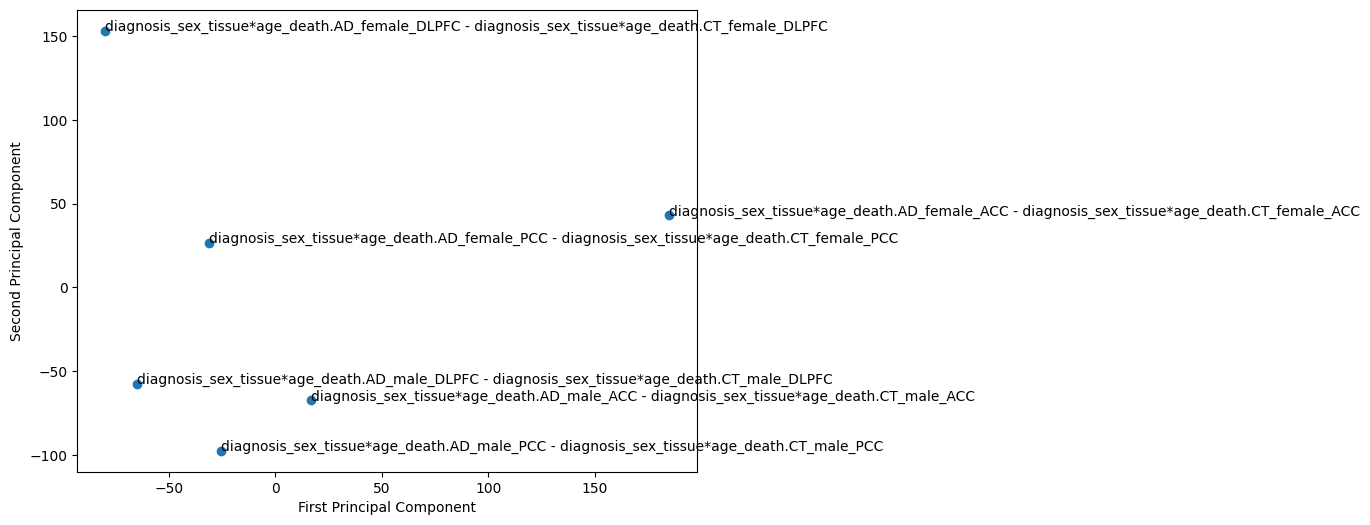

In [119]:

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df_scaled)


df_pca = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])


df_pca.index = df_pivot.index


plt.figure(figsize=(8, 6))
plt.scatter(df_pca['PC1'], df_pca['PC2'])
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

# labels
for i, comparison in enumerate(df_pca.index):
    plt.annotate(comparison, (df_pca.iloc[i].PC1, df_pca.iloc[i].PC2))

plt.show()


In [121]:
df['Comparison'].value_counts()

diagnosis_sex_tissue*age_death.AD_male_DLPFC - diagnosis_sex_tissue*age_death.CT_male_DLPFC        18859
diagnosis_sex_tissue*age_death.AD_female_DLPFC - diagnosis_sex_tissue*age_death.CT_female_DLPFC    18859
diagnosis_sex_tissue*age_death.AD_male_ACC - diagnosis_sex_tissue*age_death.CT_male_ACC            18859
diagnosis_sex_tissue*age_death.AD_female_ACC - diagnosis_sex_tissue*age_death.CT_female_ACC        18859
diagnosis_sex_tissue*age_death.AD_male_PCC - diagnosis_sex_tissue*age_death.CT_male_PCC            18859
diagnosis_sex_tissue*age_death.AD_female_PCC - diagnosis_sex_tissue*age_death.CT_female_PCC        18859
Name: Comparison, dtype: int64